In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# standard libraries and classes
import os
import sys
import time
import string
import logging
import cProfile
import pstats
import pprint
import collections

from os import walk
from io import StringIO

# third party imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns


# frequently used classes

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, roc_auc_score
from IPython.core.debugger import Tracer
from IPython.display import display, Image, FileLink
from functools import wraps
from datetime import datetime as dt
from pandas import DataFrame
from xgboost.sklearn import XGBClassifier
from scipy.stats import randint, uniform
from six.moves import cPickle as pickle
#from __future__ import print_function


# custom imports and settings

import helper_functions as hf
%reload_ext autoreload
%autoreload 2
%reload_ext version_information
%matplotlib inline
version_list = %version_information numpy, scipy, matplotlib, pandas, scikit-learn, xgboost, tensorflow
version_list_html= hf.dict_to_html(version_list.__dict__['packages'])
plt.rcParams['figure.figsize'] = (20,10)

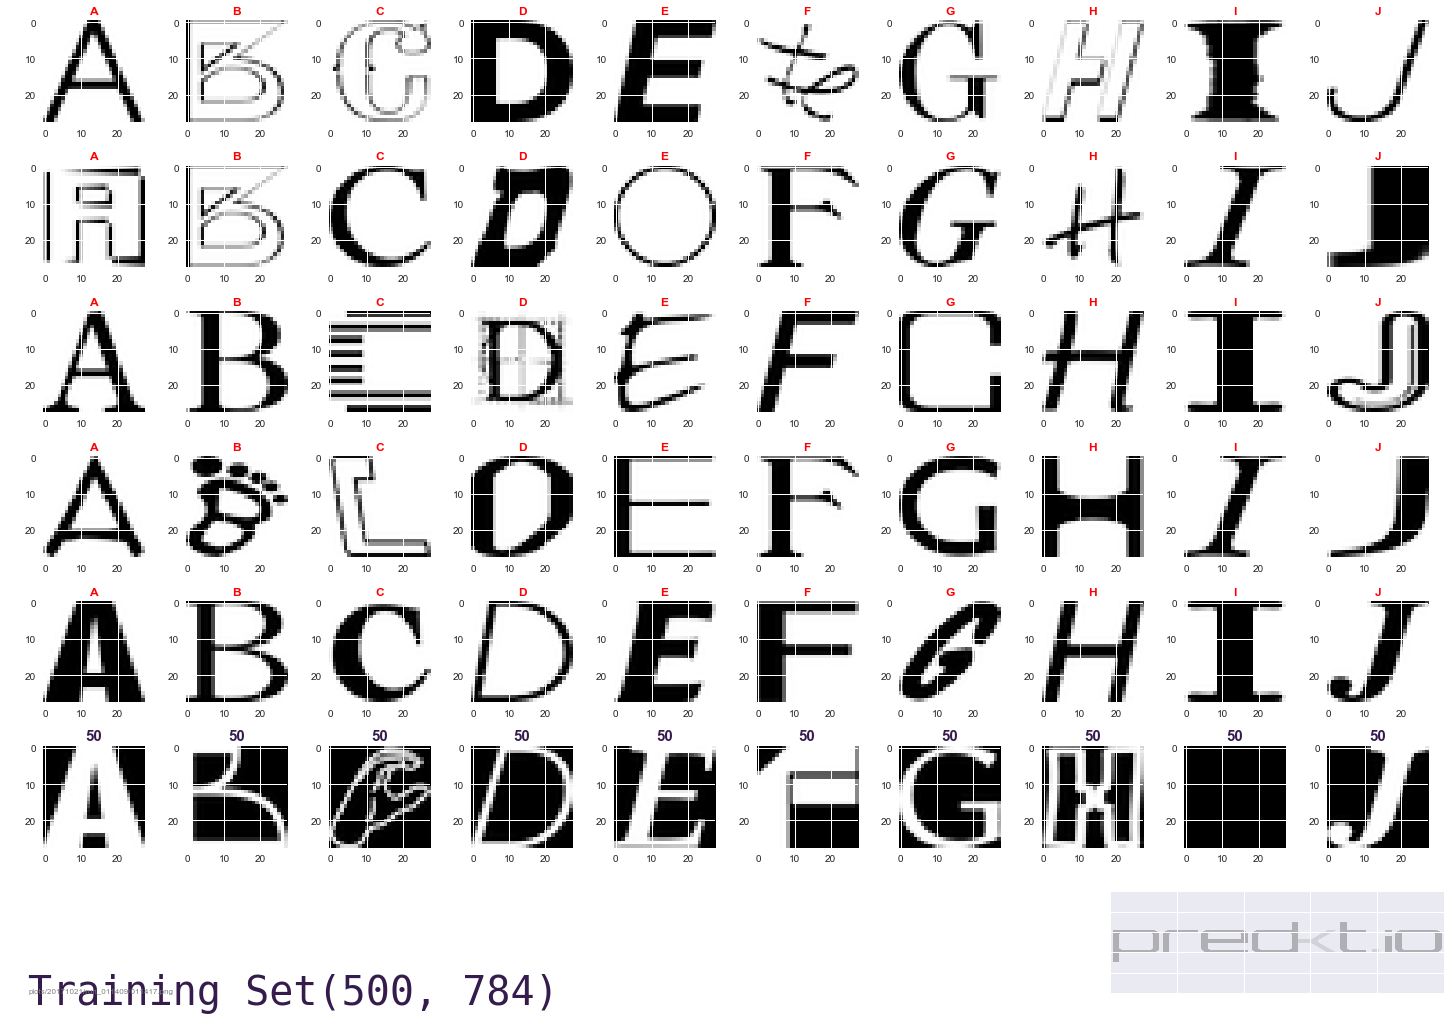

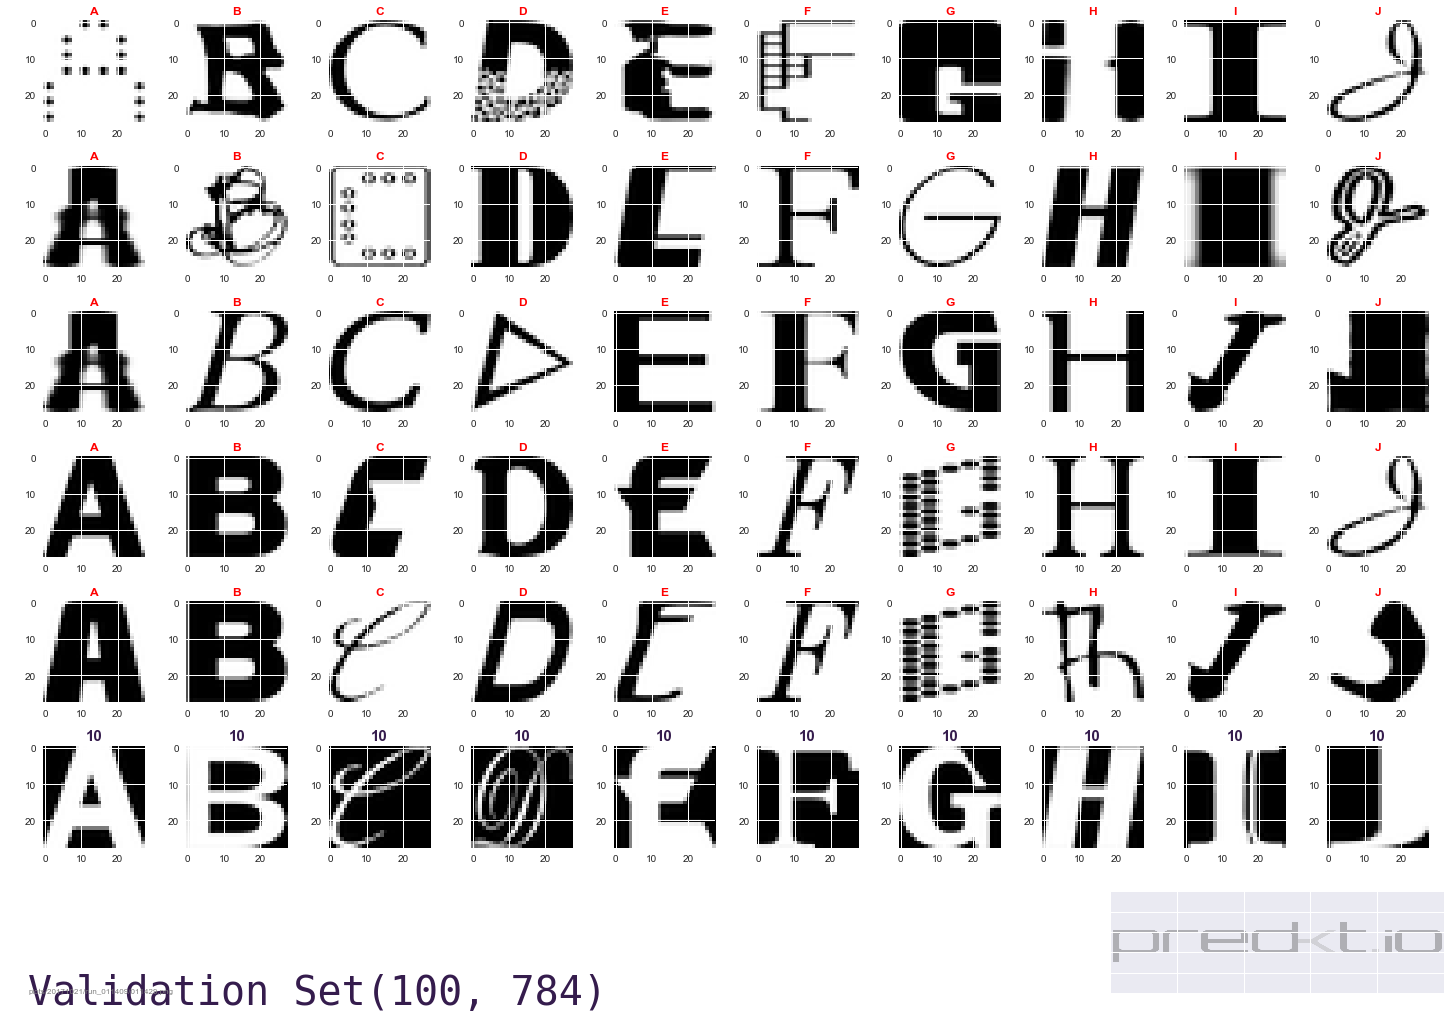

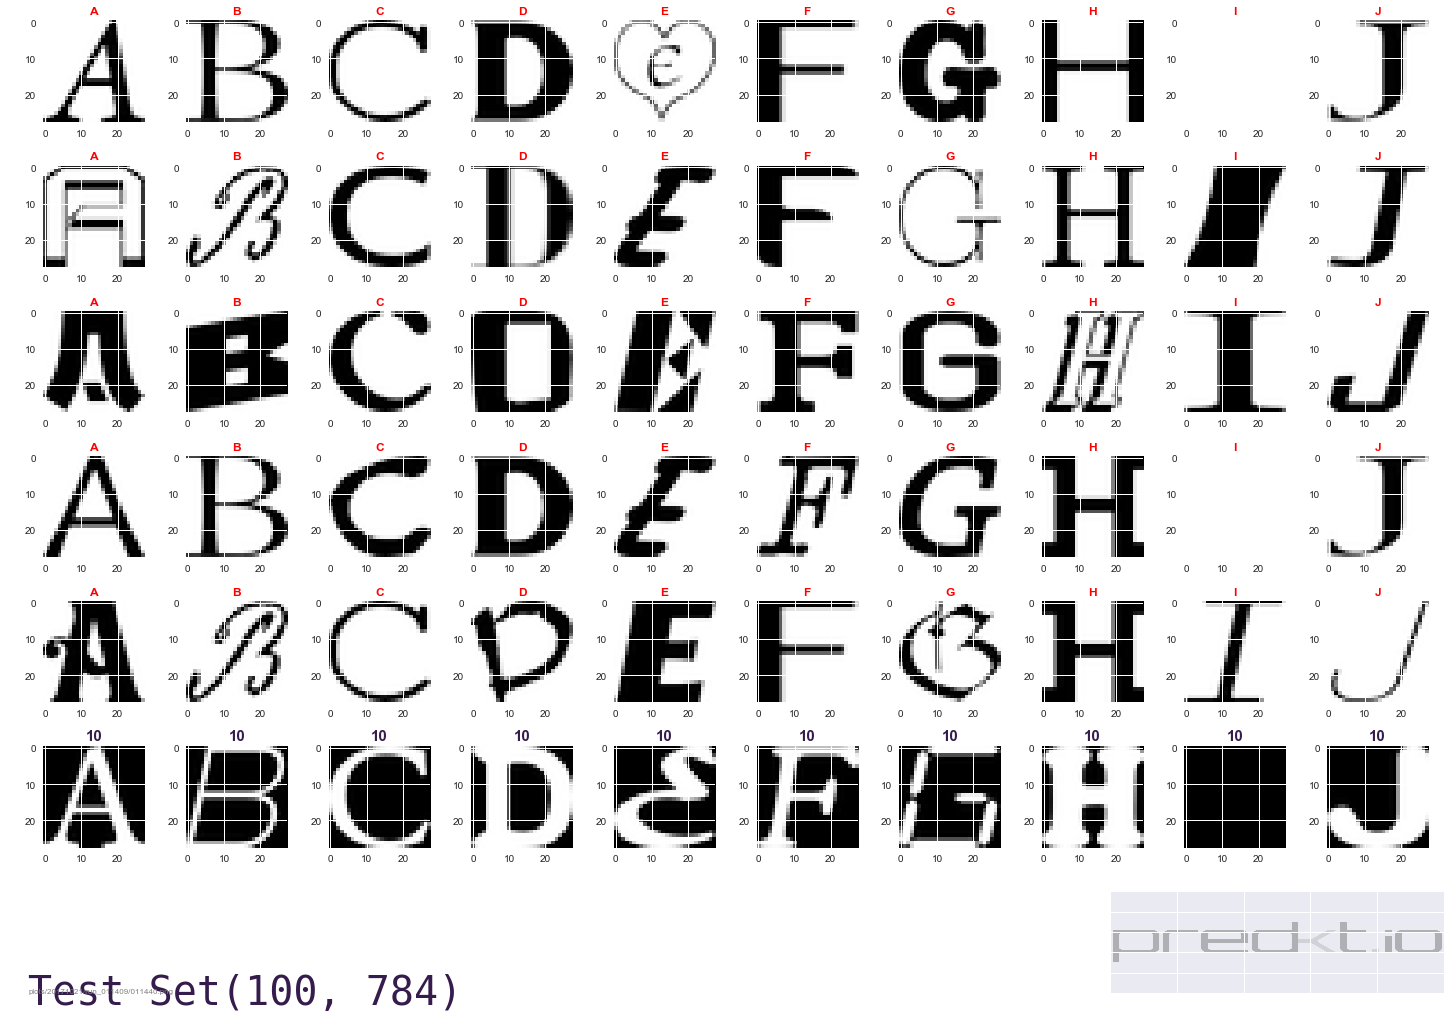

In [4]:
context = hf.get_new_context(version_list)
data_pickles = ['sample-notMNIST.pickle','notMNIST20-10-10.pickle','notMNIST50-15-15.pickle','notMNIST75-18-18.pickle','notMNIST90-30-18.pickle']
size = 50
image_size = 28
num_labels =  10
datasets, labels = hf.load_dataset(data_pickles[0], context)
data_description =['Training Set', 'Validation Set', 'Test Set']
for i in range(len(datasets)):
    hf.show_random_samples(image_size ,datasets[i], labels[i], data_description[i], context, 5, num_labels)

In [5]:
starting_parameters = {
                        'learning_rate' : .001,
                        'n_estimators' : 5000,
                        'max_depth' : 3,
                        'min_child_weight': 1,
                        'gamma' : 0,
                        'subsample' : 0.7,
                        'colsample_bytree' : 0.7,
                        'colsample_bylevel': 0.7,
                        'objective' : 'multi:softmax',
                        'reg_alpha' : 0.001,
                        'reg_lambda' : 1,
                        'num_class' : num_labels,
                        'seed' : 27}

parameter_ranges = {
    'colsample_bylevel': [0.4, 1.0],
    'colsample_bytree': [0.4, 1.0],
    'subsample': [0.4, 1.0],

    'learning_rate': [0, 1],
    'n_estimators': [15, 1000],
    
    'max_depth': [1,15],
    'min_child_weight': [1,15],
    'gamma': [0, 1],

    'reg_alpha': [-3,2],   #powers of 10
    'reg_lambda': [-3,2]}  #powers of 10

20
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 20 rounds.
[10]	Train-merror:0.2383	Test-merror:0.1809	Valid-merror:0.2544
[20]	Train-merror:0.2352	Test-merror:0.1772	Valid-merror:0.2509
[30]	Train-merror:0.2339	Test-merror:0.1766	Valid-merror:0.251
[40]	Train-merror:0.2315	Test-merror:0.1751	Valid-merror:0.2487
[50]	Train-merror:0.2316	Test-merror:0.1742	Valid-merror:0.2495
Stopping. Best iteration:
[37]	Train-merror:0.2318	Test-merror:0.1763	Valid-merror:0.2482



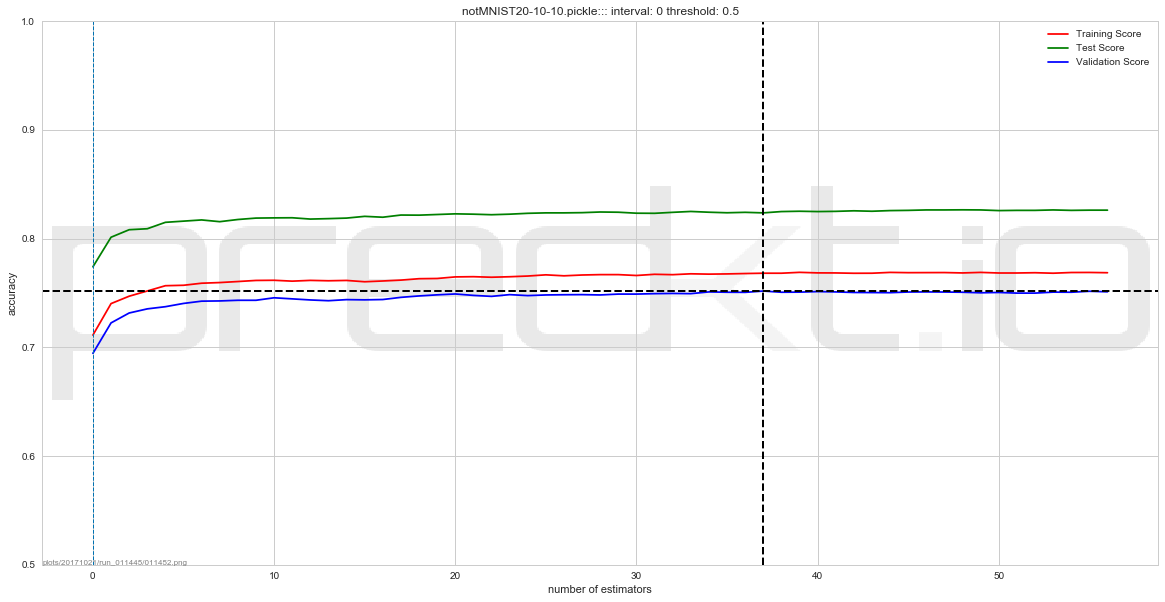

CPU times: user 3min 54s, sys: 2.69 s, total: 3min 57s
Wall time: 7.56 s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 20 rounds.
[10]	Train-merror:0.2383	Test-merror:0.1809	Valid-merror:0.2544
[20]	Train-merror:0.2352	Test-merror:0.1772	Valid-merror:0.2509
[30]	Train-merror:0.2339	Test-merror:0.1766	Valid-merror:0.251
[40]	Train-merror:0.2315	Test-merror:0.1751	Valid-merror:0.2487
[50]	Train-merror:0.2316	Test-merror:0.1742	Valid-merror:0.2495
Stopping. Best iteration:
[37]	Train-merror:0.2318	Test-merror:0.1763	Valid-merror:0.2482



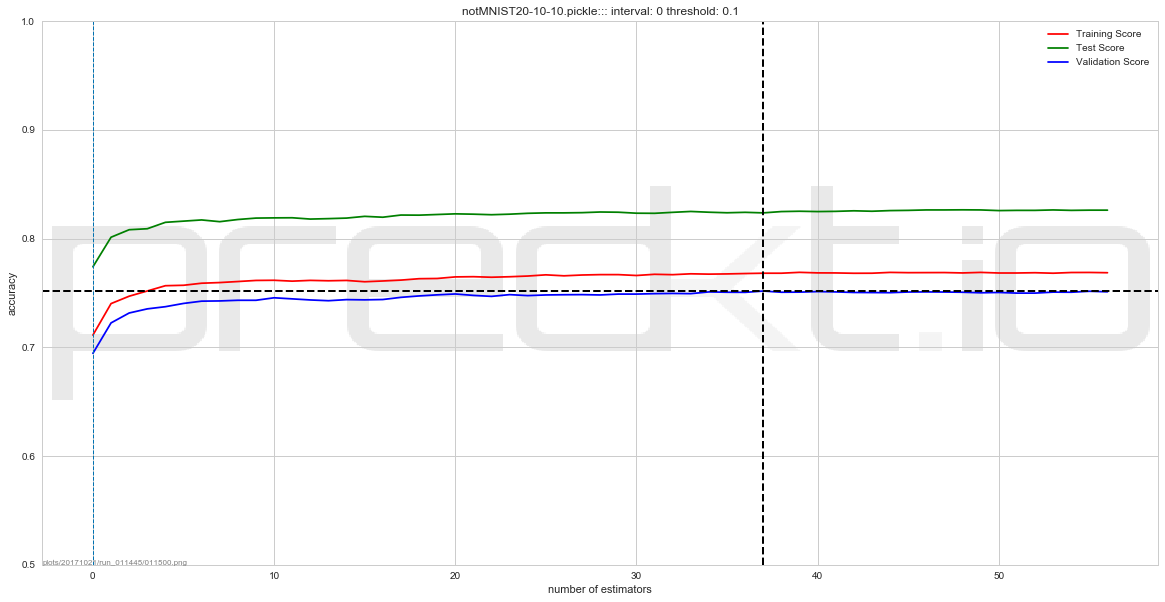

CPU times: user 3min 55s, sys: 2.6 s, total: 3min 57s
Wall time: 7.56 s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 45 rounds.
[25]	Train-merror:0.2333	Test-merror:0.1763	Valid-merror:0.2518
[50]	Train-merror:0.2316	Test-merror:0.1742	Valid-merror:0.2495
[75]	Train-merror:0.23075	Test-merror:0.1738	Valid-merror:0.246
[100]	Train-merror:0.22785	Test-merror:0.1706	Valid-merror:0.2458
[125]	Train-merror:0.228	Test-merror:0.1687	Valid-merror:0.247
Stopping. Best iteration:
[84]	Train-merror:0.22945	Test-merror:0.172	Valid-merror:0.2444



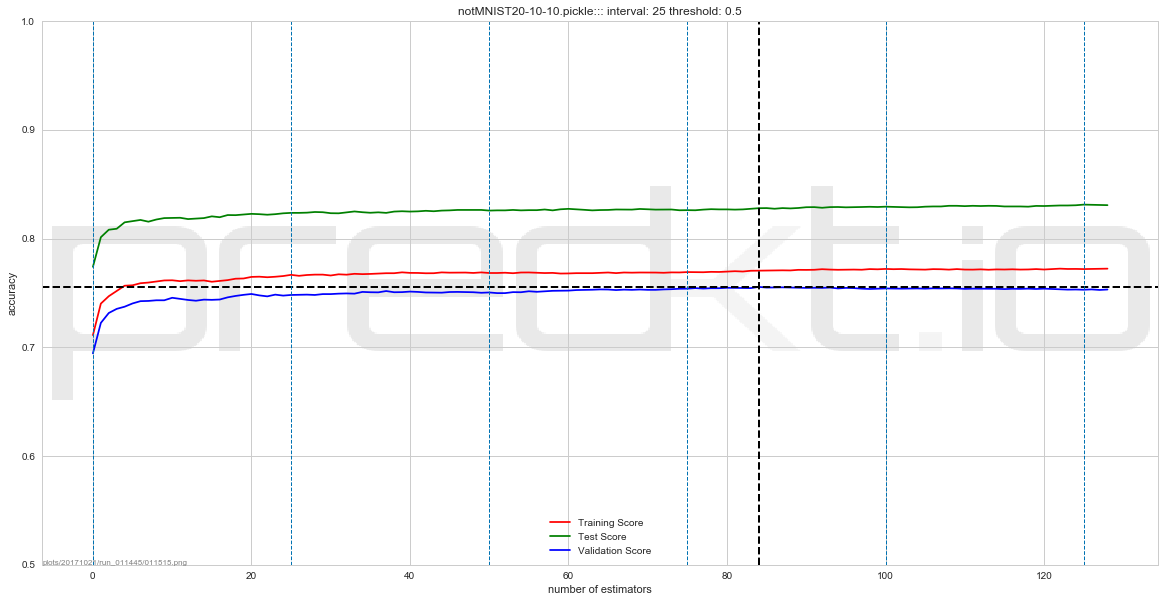

CPU times: user 8min 33s, sys: 5.24 s, total: 8min 38s
Wall time: 15.5 s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 45 rounds.
[25]	Train-merror:0.2266	Test-merror:0.1711	Valid-merror:0.2482
[50]	Train-merror:0.1521	Test-merror:0.1265	Valid-merror:0.2022
[75]	Train-merror:0.0761	Test-merror:0.109	Valid-merror:0.181
[100]	Train-merror:0.09605	Test-merror:0.1152	Valid-merror:0.1873
Stopping. Best iteration:
[74]	Train-merror:0.0755	Test-merror:0.1088	Valid-merror:0.1809



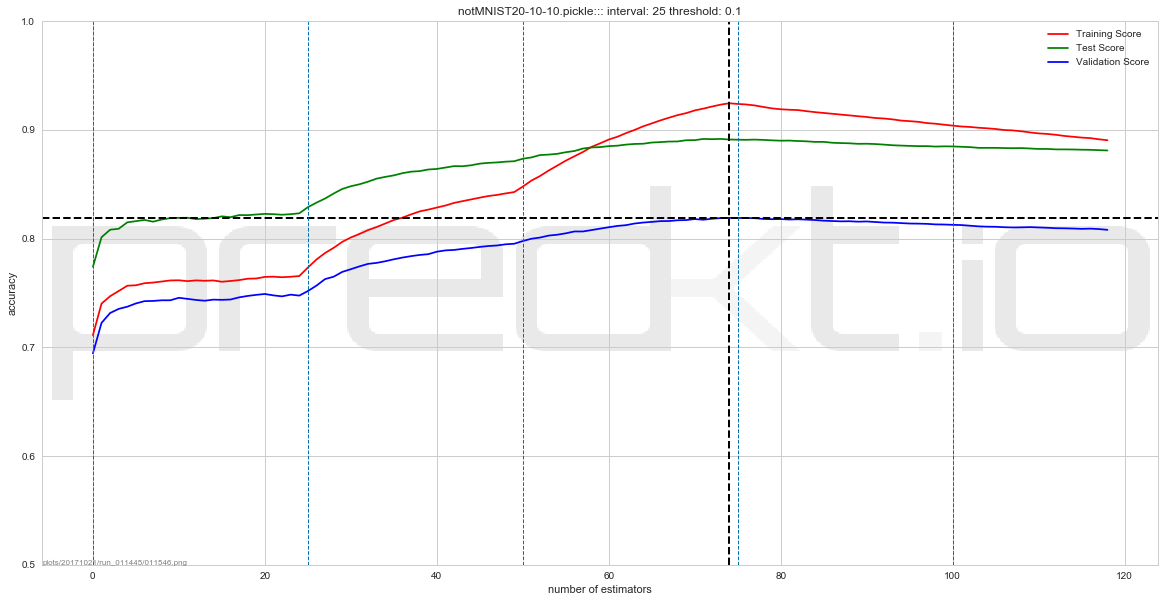

CPU times: user 17min 30s, sys: 7.73 s, total: 17min 37s
Wall time: 30.7 s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 70 rounds.
[50]	Train-merror:0.2316	Test-merror:0.1742	Valid-merror:0.2495
[100]	Train-merror:0.22785	Test-merror:0.1706	Valid-merror:0.2458
[150]	Train-merror:0.22695	Test-merror:0.1679	Valid-merror:0.2458
Stopping. Best iteration:
[84]	Train-merror:0.22945	Test-merror:0.172	Valid-merror:0.2444



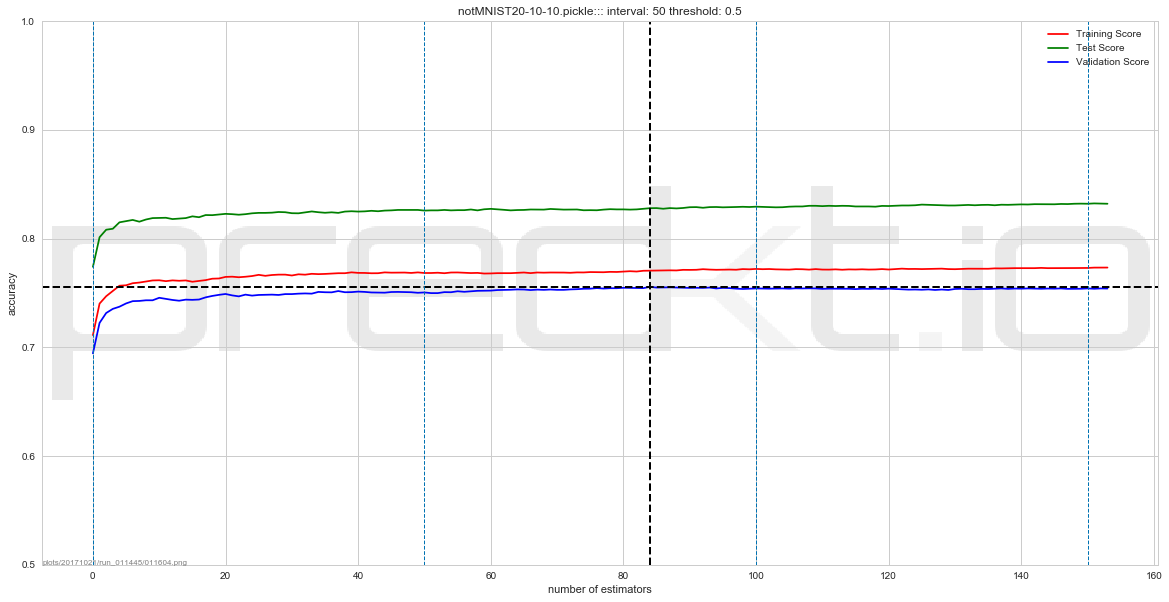

CPU times: user 9min 54s, sys: 6.56 s, total: 10min
Wall time: 17.8 s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 70 rounds.
[50]	Train-merror:0.22505	Test-merror:0.1692	Valid-merror:0.247
[100]	Train-merror:0.10885	Test-merror:0.117	Valid-merror:0.188
[150]	Train-merror:0.03615	Test-merror:0.1017	Valid-merror:0.1721
[200]	Train-merror:0.04315	Test-merror:0.101	Valid-merror:0.17
[250]	Train-merror:0.05775	Test-merror:0.1055	Valid-merror:0.1742
Stopping. Best iteration:
[199]	Train-merror:0.04285	Test-merror:0.101	Valid-merror:0.1697



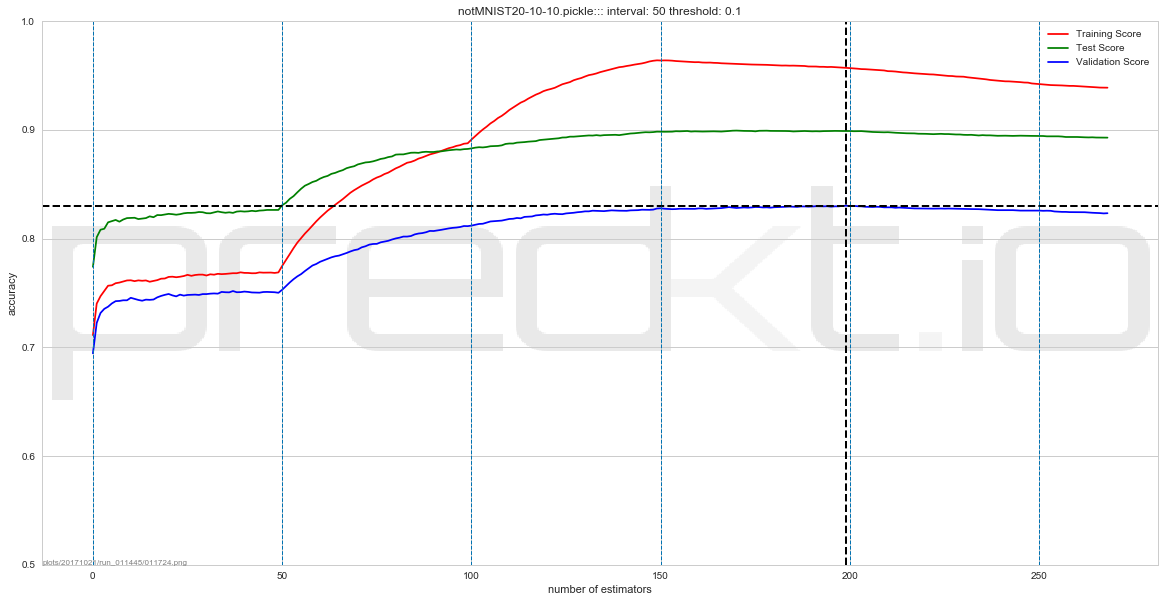

CPU times: user 47min, sys: 15.4 s, total: 47min 15s
Wall time: 1min 20s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 95 rounds.
[75]	Train-merror:0.23075	Test-merror:0.1738	Valid-merror:0.246
[150]	Train-merror:0.22695	Test-merror:0.1679	Valid-merror:0.2458
Stopping. Best iteration:
[84]	Train-merror:0.22945	Test-merror:0.172	Valid-merror:0.2444



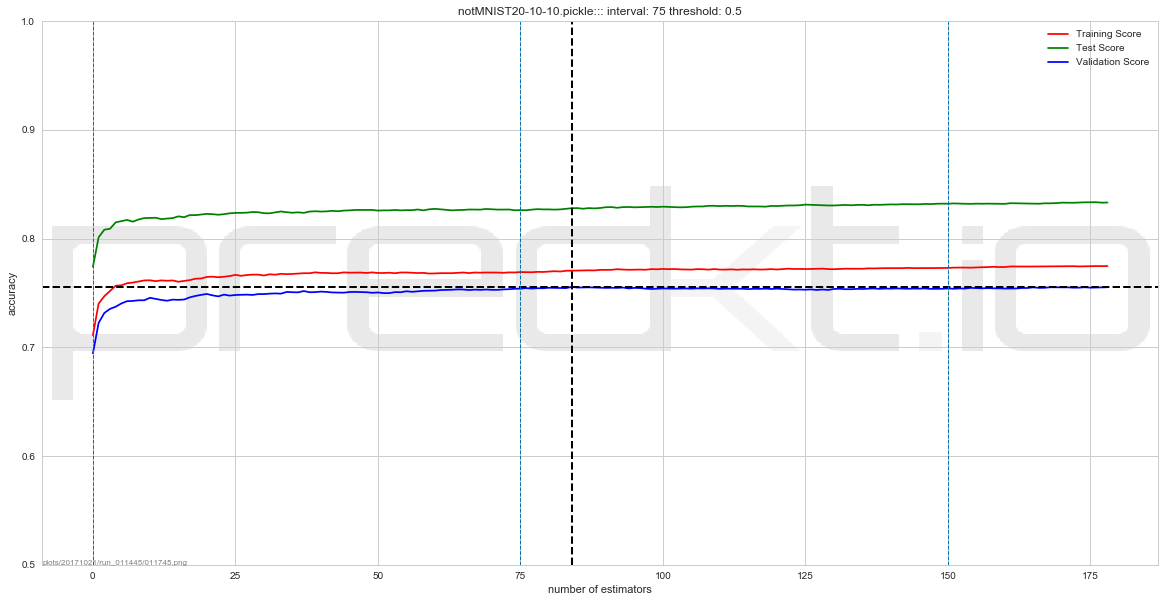

CPU times: user 11min 34s, sys: 7.51 s, total: 11min 42s
Wall time: 20.5 s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 95 rounds.
[75]	Train-merror:0.22635	Test-merror:0.1712	Valid-merror:0.2441
[150]	Train-merror:0.1076	Test-merror:0.1144	Valid-merror:0.1866
[225]	Train-merror:0.0513	Test-merror:0.1001	Valid-merror:0.1706
[300]	Train-merror:0.07005	Test-merror:0.1068	Valid-merror:0.179
Stopping. Best iteration:
[226]	Train-merror:0.0517	Test-merror:0.1002	Valid-merror:0.1704



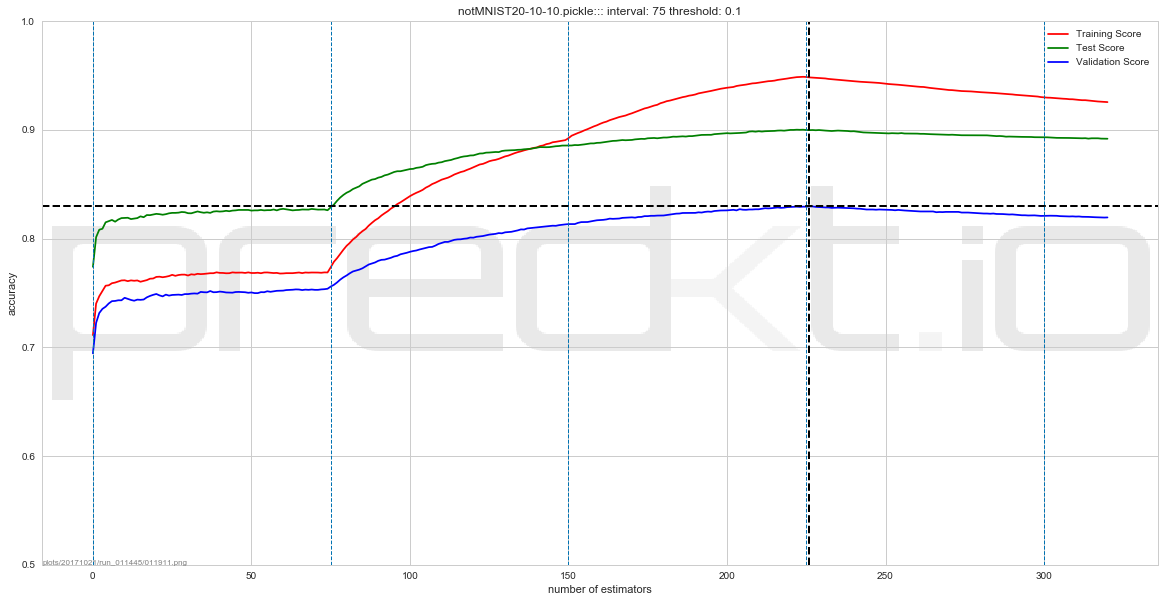

CPU times: user 50min 20s, sys: 17.7 s, total: 50min 37s
Wall time: 1min 26s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 120 rounds.
[100]	Train-merror:0.22785	Test-merror:0.1706	Valid-merror:0.2458
[200]	Train-merror:0.22425	Test-merror:0.1671	Valid-merror:0.244
[300]	Train-merror:0.22125	Test-merror:0.1642	Valid-merror:0.2426
[400]	Train-merror:0.21765	Test-merror:0.1626	Valid-merror:0.2404
[500]	Train-merror:0.2147	Test-merror:0.1598	Valid-merror:0.2386
[600]	Train-merror:0.2111	Test-merror:0.1586	Valid-merror:0.2357
[700]	Train-merror:0.2083	Test-merror:0.1563	Valid-merror:0.2337
[800]	Train-merror:0.2066	Test-merror:0.1534	Valid-merror:0.2299
[900]	Train-merror:0.20425	Test-merror:0.1512	Valid-merror:0.2281
[1000]	Train-merror:0.2022	Test-merror:0.1499	Valid-merror:0.2262
[1100]	Train-merror:0.1999	Test-merror:0.1492	Valid-mer

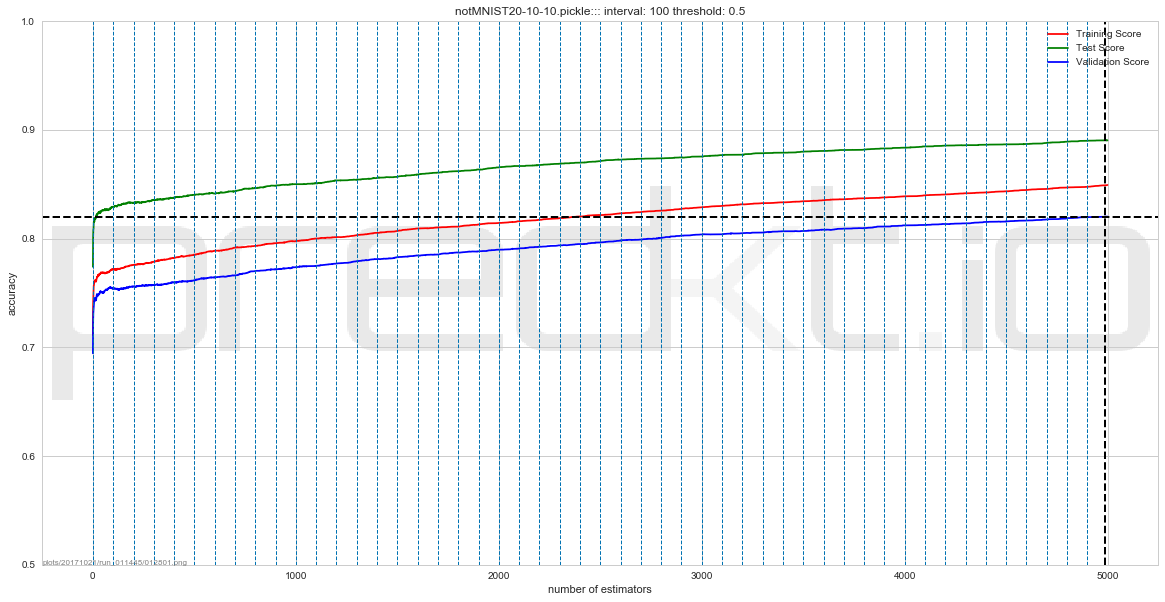

CPU times: user 5h 13min 41s, sys: 2min 32s, total: 5h 16min 14s
Wall time: 8min 50s
[0]	Train-merror:0.2887	Test-merror:0.2259	Valid-merror:0.3055
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 120 rounds.
[100]	Train-merror:0.2251	Test-merror:0.1684	Valid-merror:0.2445
[200]	Train-merror:0.10715	Test-merror:0.111	Valid-merror:0.1852
[300]	Train-merror:0.03135	Test-merror:0.0943	Valid-merror:0.163
[400]	Train-merror:0.0478	Test-merror:0.1002	Valid-merror:0.173
Stopping. Best iteration:
[299]	Train-merror:0.03125	Test-merror:0.0943	Valid-merror:0.1629



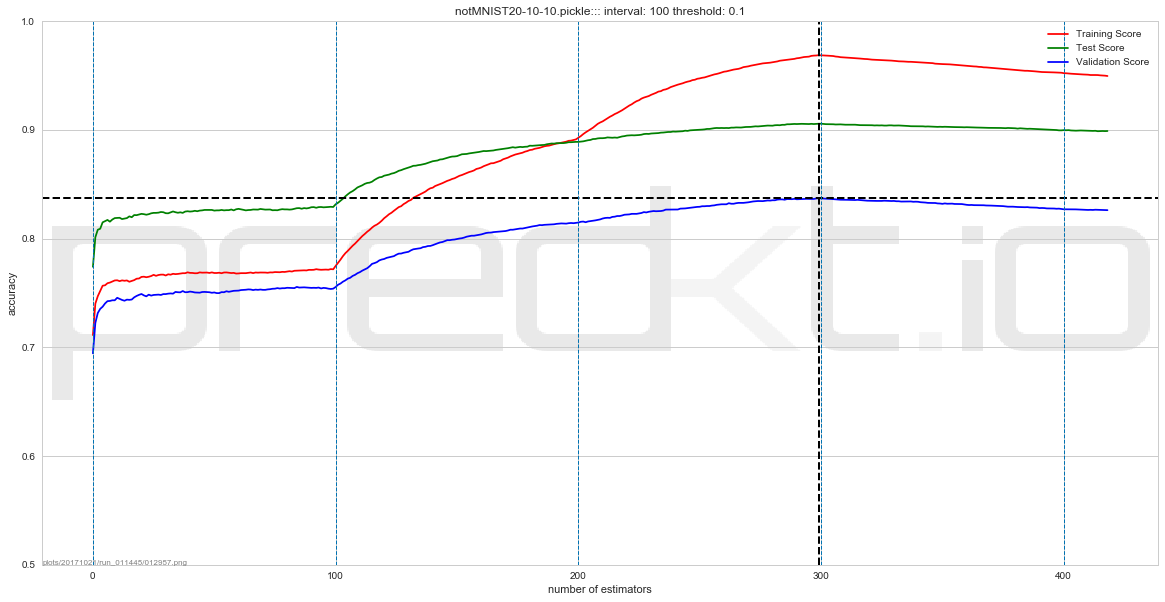

CPU times: user 1h 7min 13s, sys: 23.8 s, total: 1h 7min 37s
Wall time: 1min 55s


'Run Details:'

/datadisk/public/predkt/tuner/sandbox/runprofiles/20171021/summary_20171021011445.txt

[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 20 rounds.
[10]	Train-merror:0.24314	Test-merror:0.18	Valid-merror:0.255733
[20]	Train-merror:0.23792	Test-merror:0.175133	Valid-merror:0.251733
[30]	Train-merror:0.23698	Test-merror:0.1752	Valid-merror:0.251267
[40]	Train-merror:0.23636	Test-merror:0.175333	Valid-merror:0.2506
[50]	Train-merror:0.2357	Test-merror:0.1748	Valid-merror:0.249267
[60]	Train-merror:0.23422	Test-merror:0.174	Valid-merror:0.248
[70]	Train-merror:0.23338	Test-merror:0.173267	Valid-merror:0.2474
[80]	Train-merror:0.23264	Test-merror:0.172733	Valid-merror:0.246733
[90]	Train-merror:0.23274	Test-merror:0.1722	Valid-merror:0.246067
Stopping. Best iteration:
[74]	Train-merror:0.23292	Test-merror:0.1728	Valid-merror:0.246067



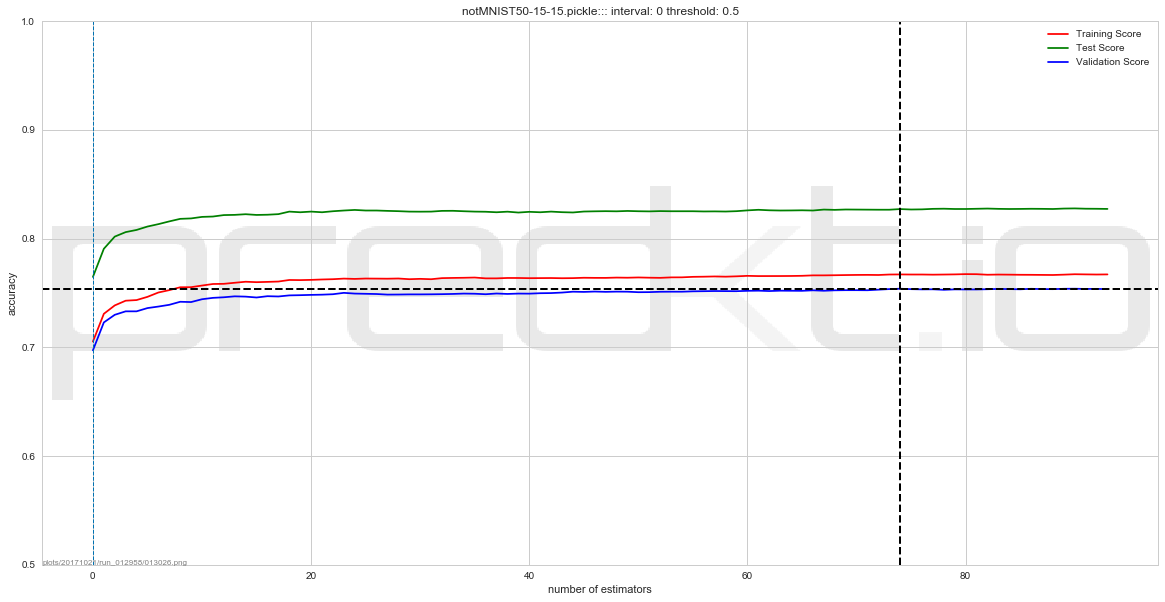

CPU times: user 16min 7s, sys: 8.41 s, total: 16min 16s
Wall time: 28.5 s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 20 rounds.
[10]	Train-merror:0.24314	Test-merror:0.18	Valid-merror:0.255733
[20]	Train-merror:0.23792	Test-merror:0.175133	Valid-merror:0.251733
[30]	Train-merror:0.23698	Test-merror:0.1752	Valid-merror:0.251267
[40]	Train-merror:0.23636	Test-merror:0.175333	Valid-merror:0.2506
[50]	Train-merror:0.2357	Test-merror:0.1748	Valid-merror:0.249267
[60]	Train-merror:0.23422	Test-merror:0.174	Valid-merror:0.248
[70]	Train-merror:0.23338	Test-merror:0.173267	Valid-merror:0.2474
[80]	Train-merror:0.23264	Test-merror:0.172733	Valid-merror:0.246733
[90]	Train-merror:0.23274	Test-merror:0.1722	Valid-merror:0.246067
Stopping. Best iteration:
[74]	Train-merror:0.23292	Test-merror:0.1728	Valid-merror:0.246067



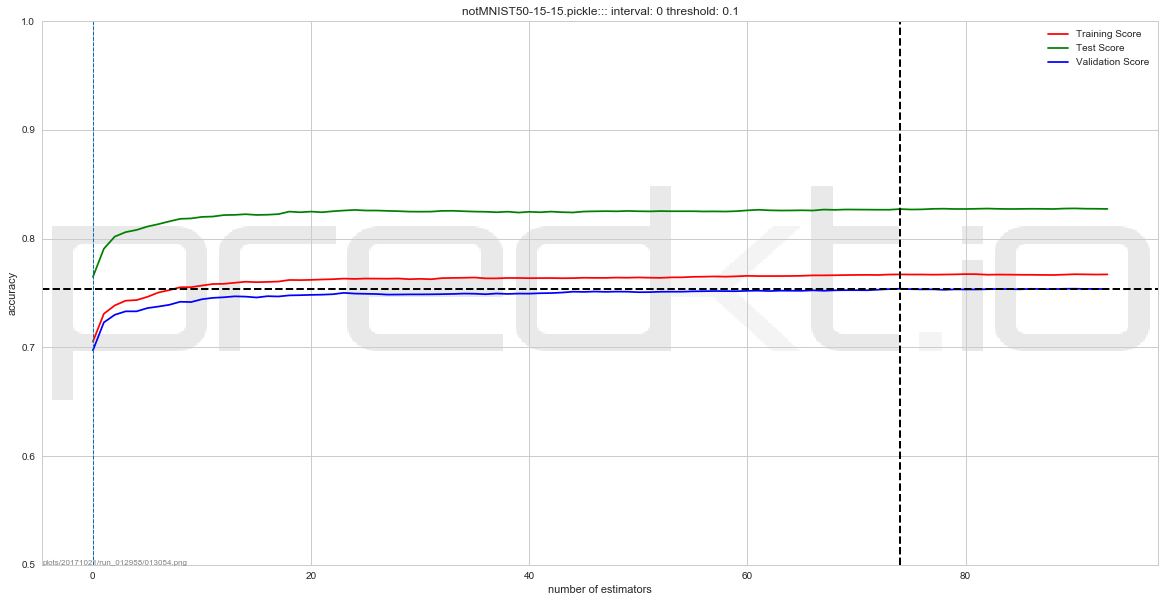

CPU times: user 16min 10s, sys: 9.27 s, total: 16min 19s
Wall time: 28.6 s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 45 rounds.
[25]	Train-merror:0.2367	Test-merror:0.174133	Valid-merror:0.250733
[50]	Train-merror:0.2357	Test-merror:0.1748	Valid-merror:0.249267
[75]	Train-merror:0.233	Test-merror:0.1732	Valid-merror:0.246467
[100]	Train-merror:0.2321	Test-merror:0.171933	Valid-merror:0.2458
[125]	Train-merror:0.2311	Test-merror:0.170533	Valid-merror:0.245333
[150]	Train-merror:0.2307	Test-merror:0.170333	Valid-merror:0.245267
[175]	Train-merror:0.23016	Test-merror:0.168933	Valid-merror:0.2432
[200]	Train-merror:0.2288	Test-merror:0.168267	Valid-merror:0.242067
[225]	Train-merror:0.22796	Test-merror:0.167267	Valid-merror:0.241533
[250]	Train-merror:0.22682	Test-merror:0.165333	Valid-merror:0.24
[275]	Train-merror:0.22532	Test-m

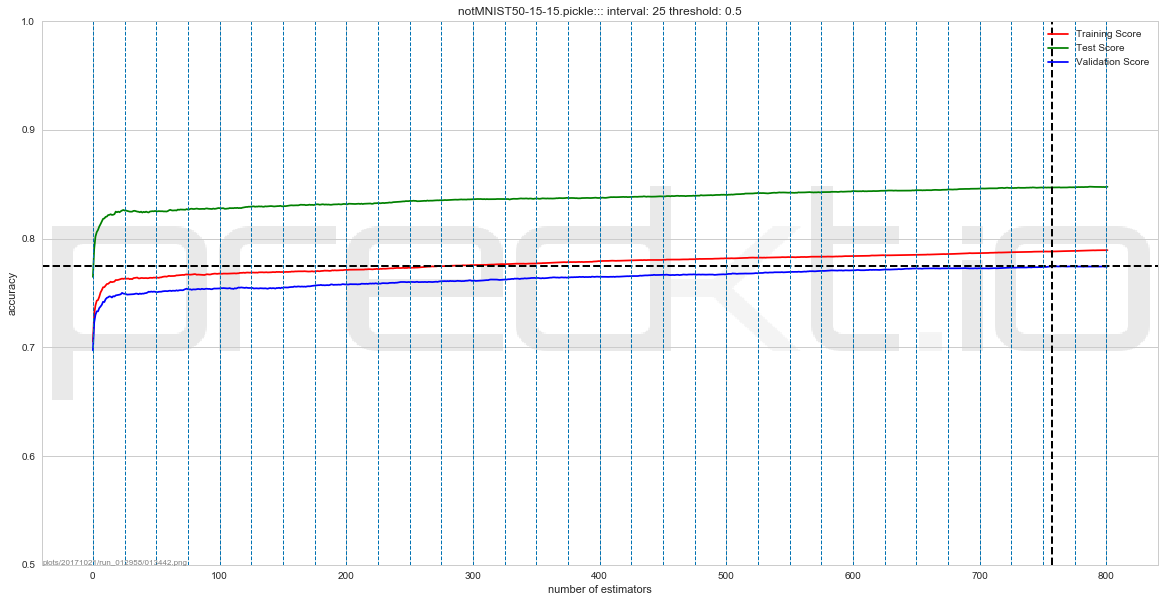

CPU times: user 2h 14min 12s, sys: 57.1 s, total: 2h 15min 9s
Wall time: 3min 47s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 45 rounds.
[25]	Train-merror:0.23756	Test-merror:0.174533	Valid-merror:0.2514
[50]	Train-merror:0.23288	Test-merror:0.1754	Valid-merror:0.252467
[75]	Train-merror:0.11074	Test-merror:0.112267	Valid-merror:0.187267
[100]	Train-merror:0.05316	Test-merror:0.090467	Valid-merror:0.160867
[125]	Train-merror:0.06276	Test-merror:0.092067	Valid-merror:0.161733
Stopping. Best iteration:
[100]	Train-merror:0.05316	Test-merror:0.090467	Valid-merror:0.160867



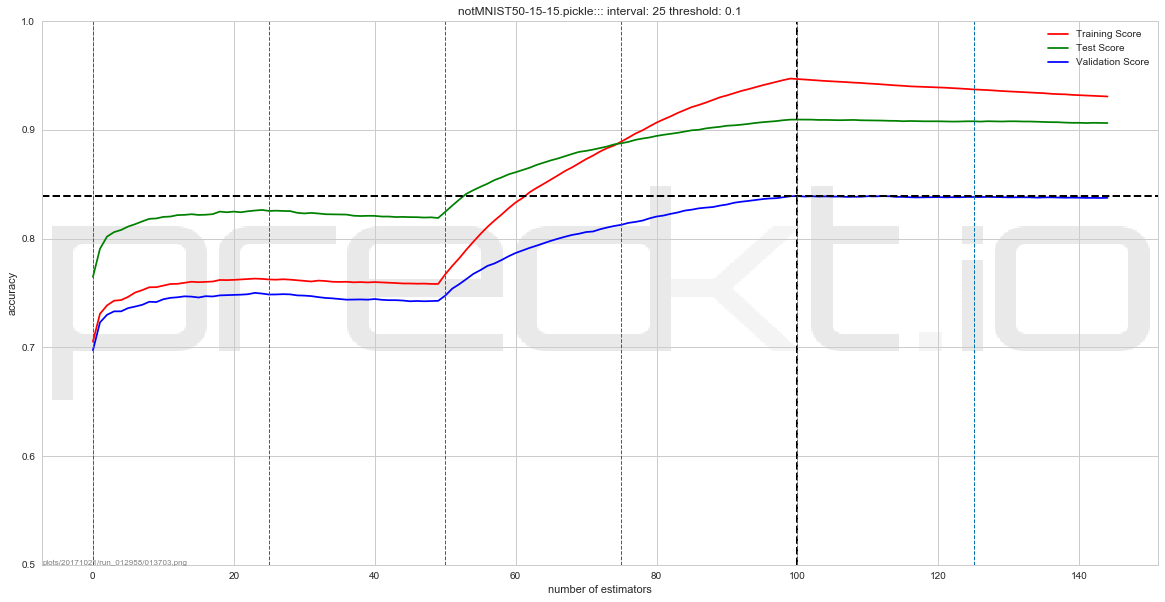

CPU times: user 1h 22min 50s, sys: 19.4 s, total: 1h 23min 9s
Wall time: 2min 20s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 70 rounds.
[50]	Train-merror:0.2357	Test-merror:0.1748	Valid-merror:0.249267
[100]	Train-merror:0.2321	Test-merror:0.171933	Valid-merror:0.2458
[150]	Train-merror:0.2307	Test-merror:0.170333	Valid-merror:0.245267
[200]	Train-merror:0.2288	Test-merror:0.168267	Valid-merror:0.242067
[250]	Train-merror:0.22682	Test-merror:0.165333	Valid-merror:0.24
[300]	Train-merror:0.22442	Test-merror:0.163667	Valid-merror:0.2388
[350]	Train-merror:0.22288	Test-merror:0.163067	Valid-merror:0.236333
[400]	Train-merror:0.22066	Test-merror:0.162533	Valid-merror:0.235067
[450]	Train-merror:0.21952	Test-merror:0.1612	Valid-merror:0.233267
[500]	Train-merror:0.2181	Test-merror:0.159667	Valid-merror:0.232733
[550]	Train-merror:0.

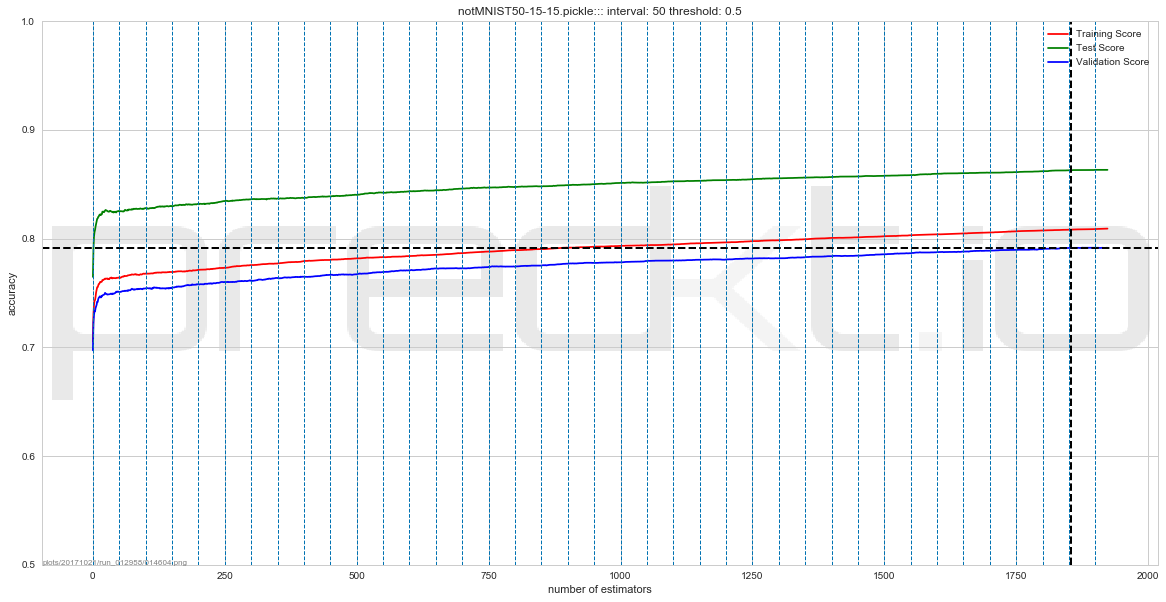

CPU times: user 5h 21min 10s, sys: 2min 11s, total: 5h 23min 22s
Wall time: 9min 1s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 70 rounds.
[50]	Train-merror:0.2258	Test-merror:0.169	Valid-merror:0.245133
[100]	Train-merror:0.055	Test-merror:0.088933	Valid-merror:0.1582
[150]	Train-merror:0.08872	Test-merror:0.1032	Valid-merror:0.1736
Stopping. Best iteration:
[99]	Train-merror:0.05424	Test-merror:0.088867	Valid-merror:0.158067



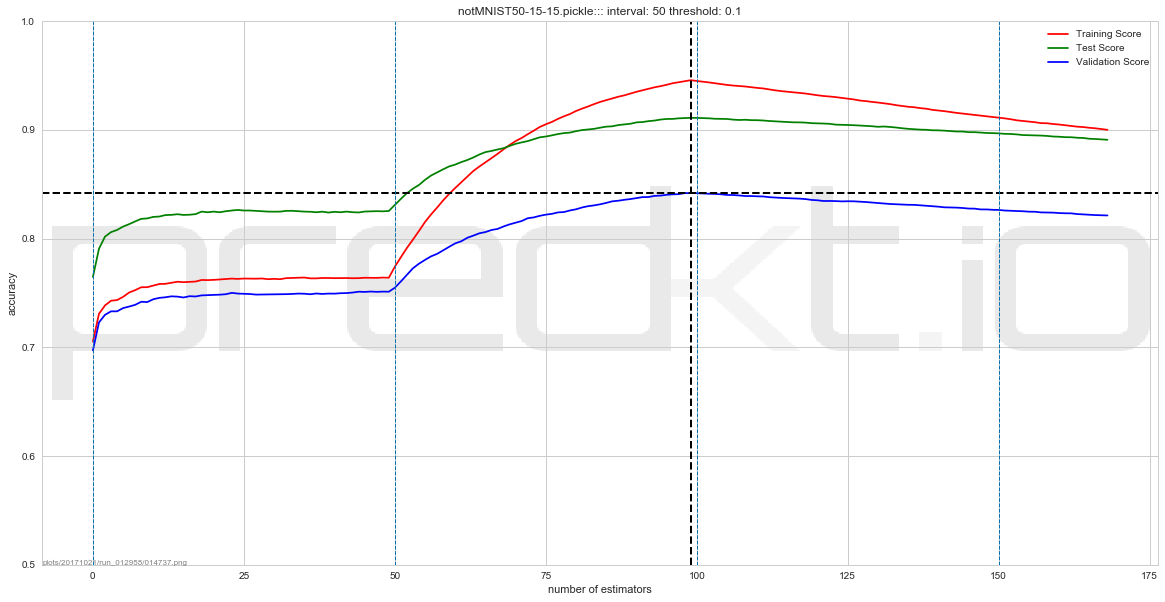

CPU times: user 54min 3s, sys: 17.6 s, total: 54min 21s
Wall time: 1min 32s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 95 rounds.
[75]	Train-merror:0.233	Test-merror:0.1732	Valid-merror:0.246467
[150]	Train-merror:0.2307	Test-merror:0.170333	Valid-merror:0.245267
[225]	Train-merror:0.22796	Test-merror:0.167267	Valid-merror:0.241533
[300]	Train-merror:0.22442	Test-merror:0.163667	Valid-merror:0.2388
[375]	Train-merror:0.22154	Test-merror:0.1626	Valid-merror:0.2358
[450]	Train-merror:0.21952	Test-merror:0.1612	Valid-merror:0.233267
[525]	Train-merror:0.21744	Test-merror:0.157933	Valid-merror:0.231867
[600]	Train-merror:0.21604	Test-merror:0.156267	Valid-merror:0.229133
[675]	Train-merror:0.2142	Test-merror:0.1548	Valid-merror:0.227333
[750]	Train-merror:0.2119	Test-merror:0.153067	Valid-merror:0.226
[825]	Train-merror:0.2102	Test

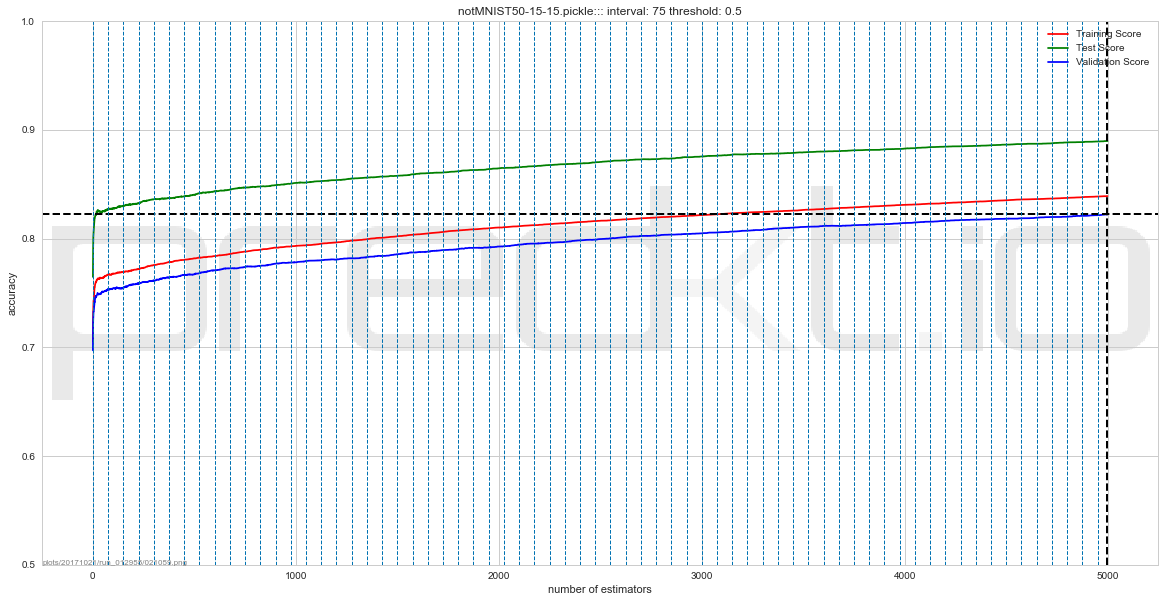

CPU times: user 13h 53min 3s, sys: 5min 35s, total: 13h 58min 38s
Wall time: 23min 22s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 95 rounds.
[75]	Train-merror:0.23266	Test-merror:0.1724	Valid-merror:0.245933
[150]	Train-merror:0.20992	Test-merror:0.1534	Valid-merror:0.2308
[225]	Train-merror:0.06748	Test-merror:0.106933	Valid-merror:0.175
[300]	Train-merror:0.07562	Test-merror:0.101067	Valid-merror:0.171467
[375]	Train-merror:0.08164	Test-merror:0.1	Valid-merror:0.169933
[450]	Train-merror:0.08626	Test-merror:0.099333	Valid-merror:0.168533
[525]	Train-merror:0.08974	Test-merror:0.098267	Valid-merror:0.1672
[600]	Train-merror:0.0929	Test-merror:0.097133	Valid-merror:0.165467
[675]	Train-merror:0.09504	Test-merror:0.0962	Valid-merror:0.1636
[750]	Train-merror:0.0964	Test-merror:0.095333	Valid-merror:0.1626
[825]	Train-merror:0.09

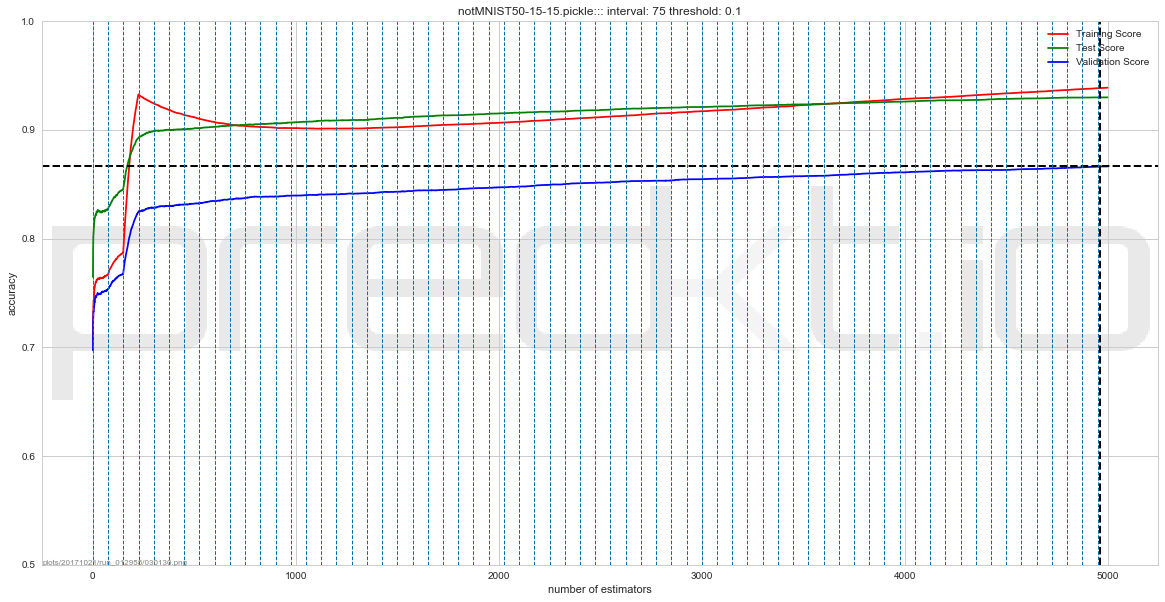

CPU times: user 1d 6h 1min 13s, sys: 7min 51s, total: 1d 6h 9min 4s
Wall time: 50min 30s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 120 rounds.
[100]	Train-merror:0.2321	Test-merror:0.171933	Valid-merror:0.2458
[200]	Train-merror:0.2288	Test-merror:0.168267	Valid-merror:0.242067
[300]	Train-merror:0.22442	Test-merror:0.163667	Valid-merror:0.2388
[400]	Train-merror:0.22066	Test-merror:0.162533	Valid-merror:0.235067
[500]	Train-merror:0.2181	Test-merror:0.159667	Valid-merror:0.232733
[600]	Train-merror:0.21604	Test-merror:0.156267	Valid-merror:0.229133
[700]	Train-merror:0.21324	Test-merror:0.153933	Valid-merror:0.227267
[800]	Train-merror:0.21062	Test-merror:0.152333	Valid-merror:0.225733
[900]	Train-merror:0.2083	Test-merror:0.1508	Valid-merror:0.223067
[1000]	Train-merror:0.20666	Test-merror:0.148733	Valid-merror:0.2218
[1100]

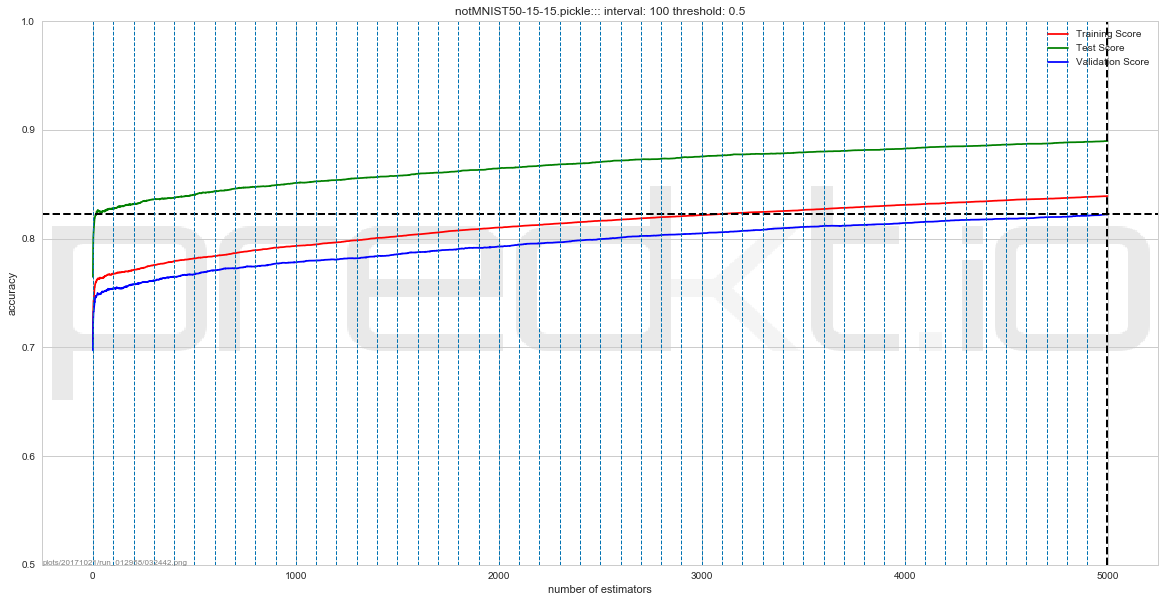

CPU times: user 13h 46min 47s, sys: 5min 32s, total: 13h 52min 20s
Wall time: 23min 12s
[0]	Train-merror:0.29464	Test-merror:0.2352	Valid-merror:0.302733
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 120 rounds.
[100]	Train-merror:0.22846	Test-merror:0.1698	Valid-merror:0.243667
[200]	Train-merror:0.10546	Test-merror:0.098667	Valid-merror:0.1692
[300]	Train-merror:0.04214	Test-merror:0.0802	Valid-merror:0.146867
[400]	Train-merror:0.04352	Test-merror:0.076933	Valid-merror:0.144133
[500]	Train-merror:0.0542	Test-merror:0.080067	Valid-merror:0.147667
Stopping. Best iteration:
[385]	Train-merror:0.04322	Test-merror:0.076933	Valid-merror:0.143533



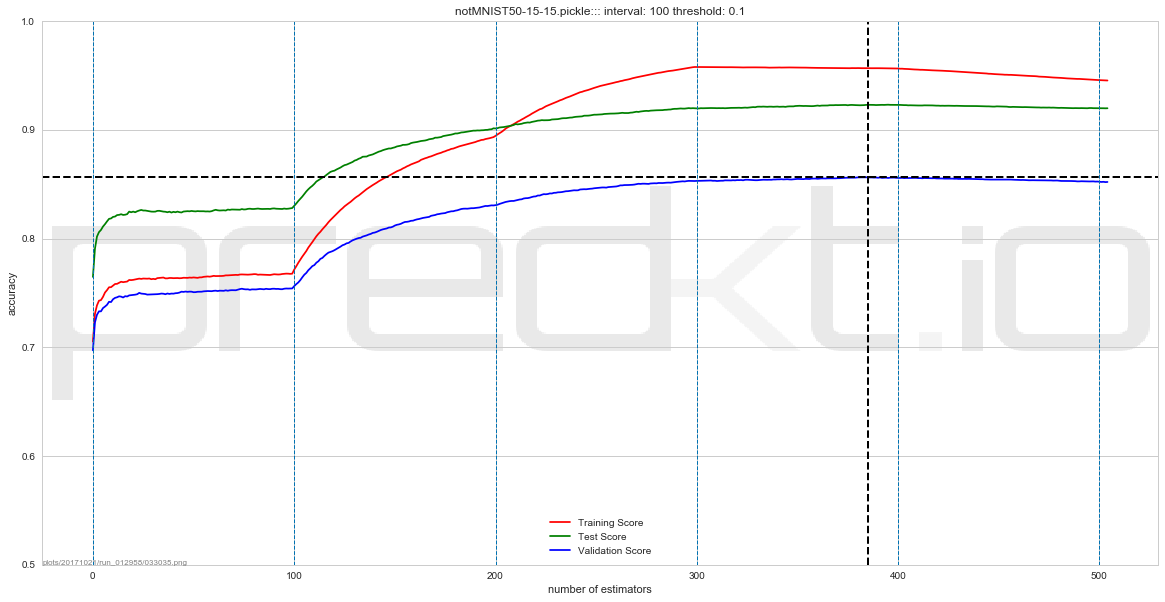

CPU times: user 3h 28min 4s, sys: 1min 2s, total: 3h 29min 6s
Wall time: 5min 53s


'Run Details:'

/datadisk/public/predkt/tuner/sandbox/runprofiles/20171021/summary_20171021012958.txt

[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 20 rounds.
[10]	Train-merror:0.246307	Test-merror:0.180389	Valid-merror:0.250556
[20]	Train-merror:0.242587	Test-merror:0.175944	Valid-merror:0.245556
[30]	Train-merror:0.24244	Test-merror:0.174	Valid-merror:0.245278
[40]	Train-merror:0.239853	Test-merror:0.173444	Valid-merror:0.245278
[50]	Train-merror:0.2394	Test-merror:0.171333	Valid-merror:0.243889
[60]	Train-merror:0.23844	Test-merror:0.169333	Valid-merror:0.242556
[70]	Train-merror:0.238213	Test-merror:0.169389	Valid-merror:0.242944
[80]	Train-merror:0.237707	Test-merror:0.168278	Valid-merror:0.242611
[90]	Train-merror:0.237907	Test-merror:0.168611	Valid-merror:0.242667
[100]	Train-merror:0.238307	Test-merror:0.169611	Valid-merror:0.242778
Stopping. Best iteration:
[83]	Train-merror:0.237733	Test-merror:0.168389	Valid-merror:0

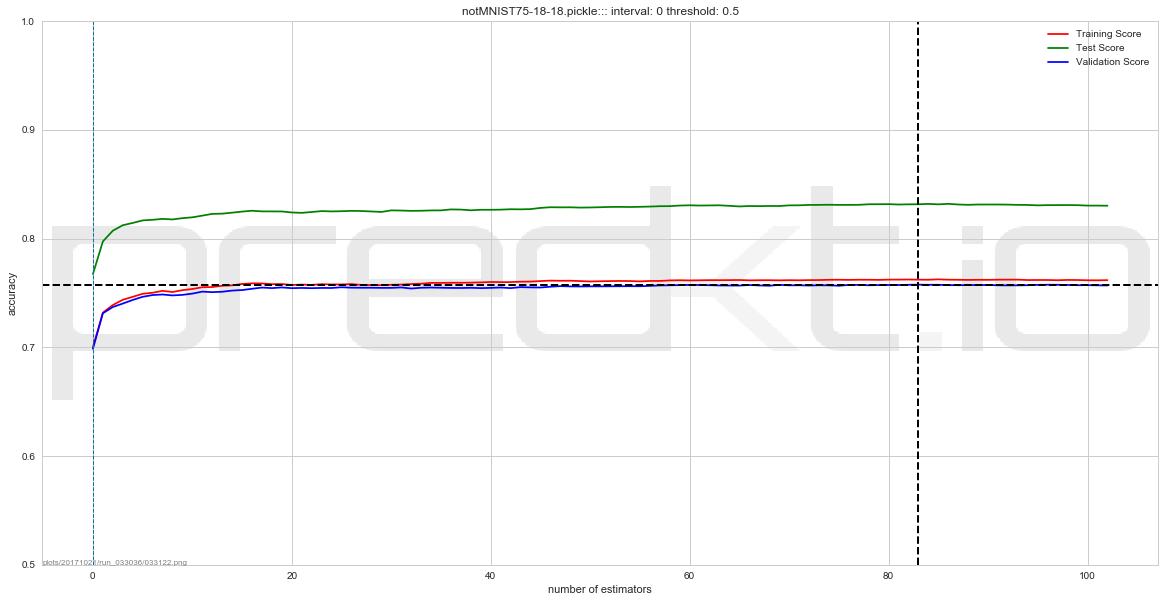

CPU times: user 26min 2s, sys: 12.1 s, total: 26min 14s
Wall time: 45.4 s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 20 rounds.
[10]	Train-merror:0.246307	Test-merror:0.180389	Valid-merror:0.250556
[20]	Train-merror:0.242587	Test-merror:0.175944	Valid-merror:0.245556
[30]	Train-merror:0.24244	Test-merror:0.174	Valid-merror:0.245278
[40]	Train-merror:0.239853	Test-merror:0.173444	Valid-merror:0.245278
[50]	Train-merror:0.2394	Test-merror:0.171333	Valid-merror:0.243889
[60]	Train-merror:0.23844	Test-merror:0.169333	Valid-merror:0.242556
[70]	Train-merror:0.238213	Test-merror:0.169389	Valid-merror:0.242944
[80]	Train-merror:0.237707	Test-merror:0.168278	Valid-merror:0.242611
[90]	Train-merror:0.237907	Test-merror:0.168611	Valid-merror:0.242667
[100]	Train-merror:0.238307	Test-merror:0.169611	Valid-merror:0.242778
Stopping. Best

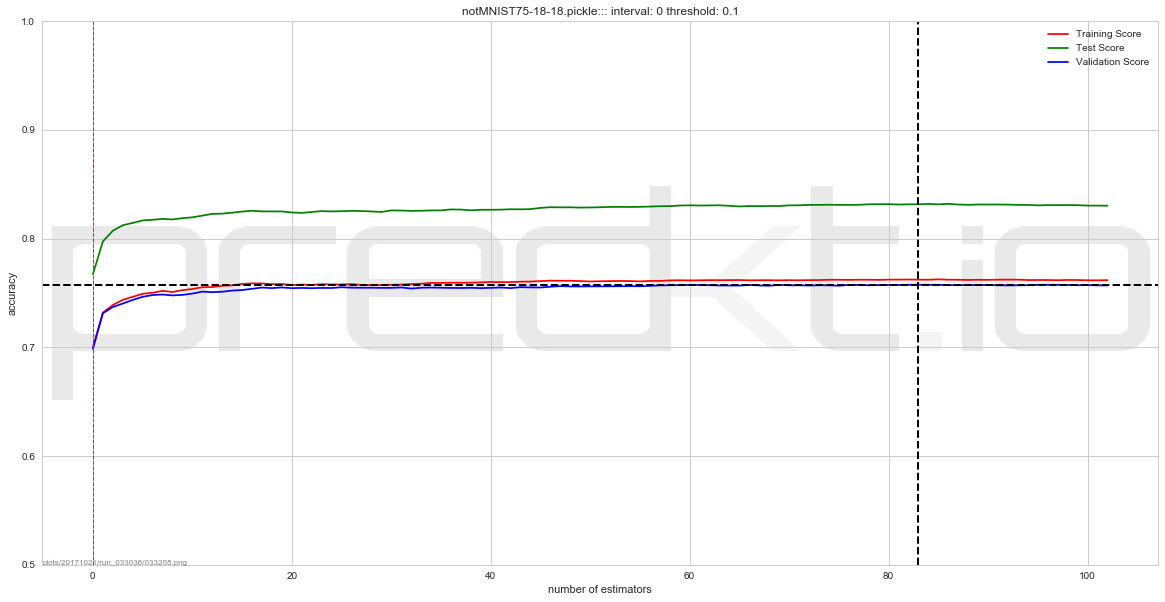

CPU times: user 26min 24s, sys: 13.4 s, total: 26min 37s
Wall time: 46.1 s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 45 rounds.
[25]	Train-merror:0.242133	Test-merror:0.174778	Valid-merror:0.244722
[50]	Train-merror:0.2394	Test-merror:0.171333	Valid-merror:0.243889
[75]	Train-merror:0.237813	Test-merror:0.168944	Valid-merror:0.243333
[100]	Train-merror:0.238307	Test-merror:0.169611	Valid-merror:0.242778
[125]	Train-merror:0.237453	Test-merror:0.169222	Valid-merror:0.2425
[150]	Train-merror:0.235907	Test-merror:0.169333	Valid-merror:0.242167
[175]	Train-merror:0.235333	Test-merror:0.168722	Valid-merror:0.241444
[200]	Train-merror:0.234747	Test-merror:0.168167	Valid-merror:0.239944
[225]	Train-merror:0.23376	Test-merror:0.1675	Valid-merror:0.238556
[250]	Train-merror:0.233053	Test-merror:0.166778	Valid-merror:0.238056
[275]	T

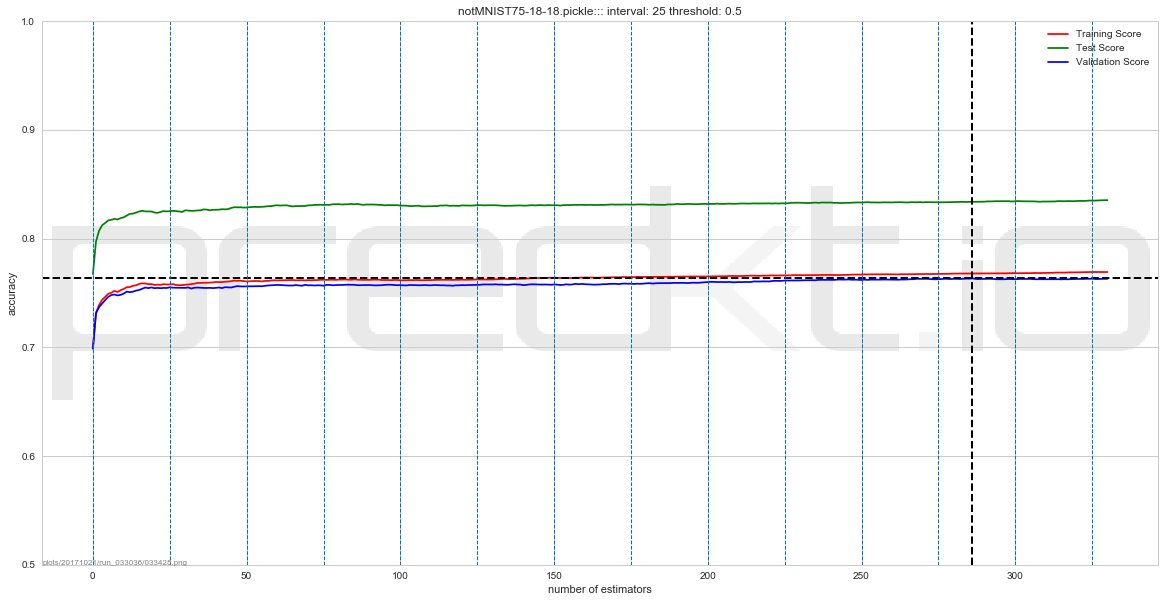

CPU times: user 1h 22min 35s, sys: 34.7 s, total: 1h 23min 9s
Wall time: 2min 20s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 45 rounds.
[25]	Train-merror:0.242267	Test-merror:0.174444	Valid-merror:0.2455
[50]	Train-merror:0.236827	Test-merror:0.173222	Valid-merror:0.245
[75]	Train-merror:0.09276	Test-merror:0.105722	Valid-merror:0.170889
[100]	Train-merror:0.04996	Test-merror:0.0865	Valid-merror:0.150556
[125]	Train-merror:0.053947	Test-merror:0.082444	Valid-merror:0.148167
[150]	Train-merror:0.057333	Test-merror:0.0805	Valid-merror:0.146389
[175]	Train-merror:0.060307	Test-merror:0.0795	Valid-merror:0.145222
[200]	Train-merror:0.06272	Test-merror:0.078556	Valid-merror:0.144444
[225]	Train-merror:0.064893	Test-merror:0.077667	Valid-merror:0.143556
[250]	Train-merror:0.06652	Test-merror:0.077056	Valid-merror:0.143333
[275]	Tr

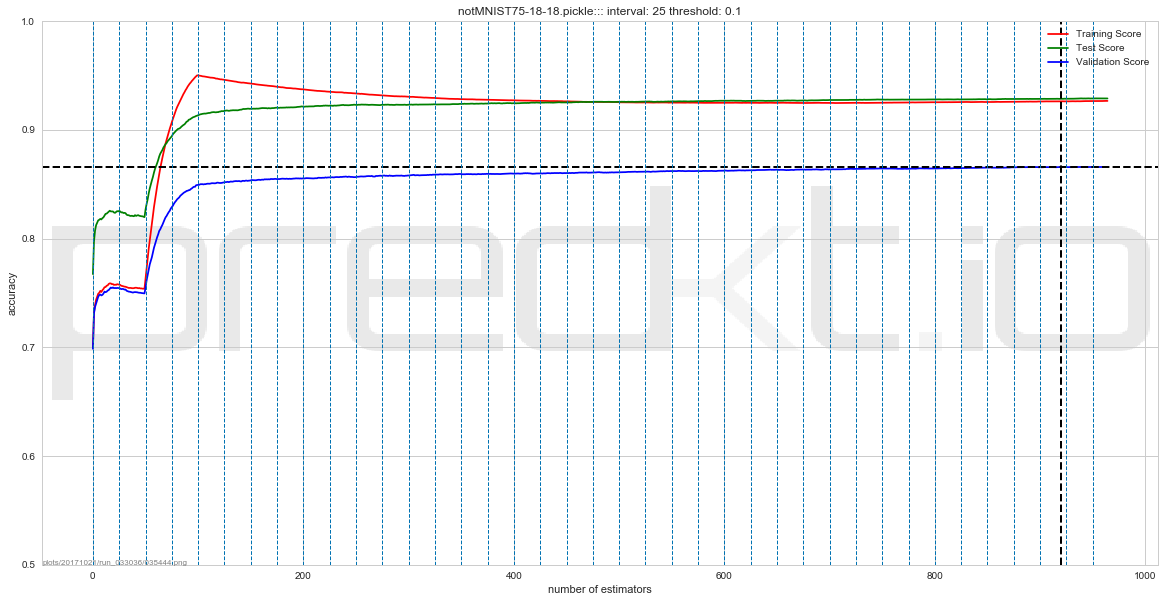

CPU times: user 12h 1min 46s, sys: 3min 1s, total: 12h 4min 48s
Wall time: 20min 15s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 70 rounds.
[50]	Train-merror:0.2394	Test-merror:0.171333	Valid-merror:0.243889
[100]	Train-merror:0.238307	Test-merror:0.169611	Valid-merror:0.242778
[150]	Train-merror:0.235907	Test-merror:0.169333	Valid-merror:0.242167
[200]	Train-merror:0.234747	Test-merror:0.168167	Valid-merror:0.239944
[250]	Train-merror:0.233053	Test-merror:0.166778	Valid-merror:0.238056
[300]	Train-merror:0.2318	Test-merror:0.165556	Valid-merror:0.237333
[350]	Train-merror:0.22964	Test-merror:0.164444	Valid-merror:0.235944
[400]	Train-merror:0.22816	Test-merror:0.162833	Valid-merror:0.234389
[450]	Train-merror:0.22668	Test-merror:0.161389	Valid-merror:0.233278
[500]	Train-merror:0.22476	Test-merror:0.1605	Valid-merror:0.2315


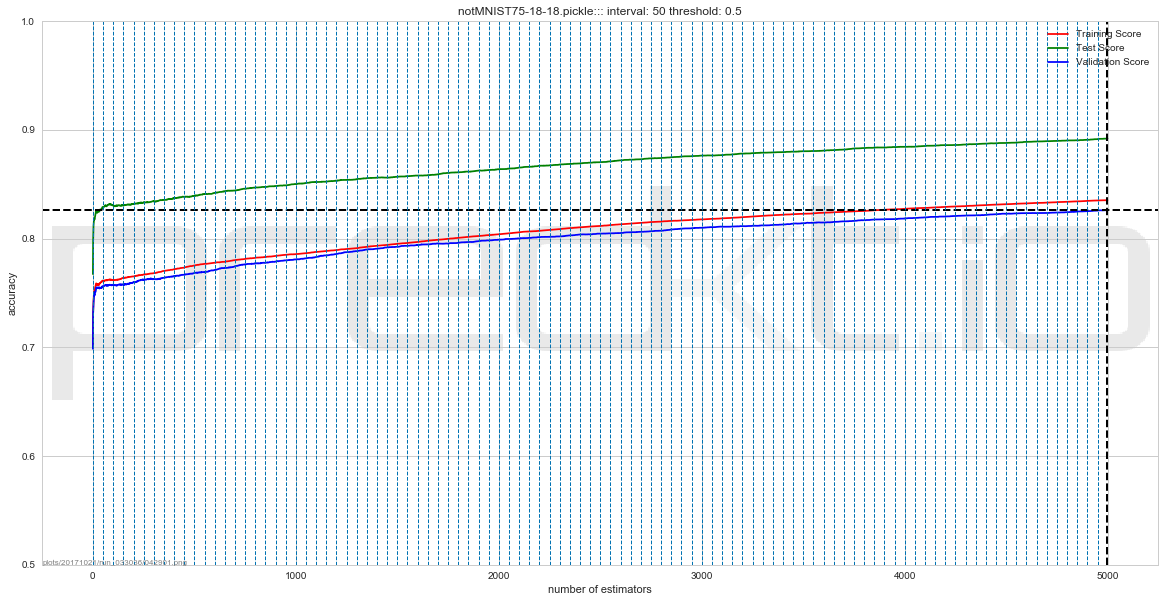

CPU times: user 20h 23min 37s, sys: 7min 26s, total: 20h 31min 4s
Wall time: 34min 17s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 70 rounds.
[50]	Train-merror:0.2344	Test-merror:0.167056	Valid-merror:0.240222
[100]	Train-merror:0.151747	Test-merror:0.1075	Valid-merror:0.177278
[150]	Train-merror:0.116933	Test-merror:0.092722	Valid-merror:0.160778
[200]	Train-merror:0.090173	Test-merror:0.083778	Valid-merror:0.152444
[250]	Train-merror:0.077267	Test-merror:0.080167	Valid-merror:0.147722
[300]	Train-merror:0.06912	Test-merror:0.078333	Valid-merror:0.145
[350]	Train-merror:0.06388	Test-merror:0.076722	Valid-merror:0.142389
[400]	Train-merror:0.060027	Test-merror:0.0755	Valid-merror:0.141222
[450]	Train-merror:0.05688	Test-merror:0.075111	Valid-merror:0.140222
[500]	Train-merror:0.054507	Test-merror:0.074278	Valid-merror:0.13938

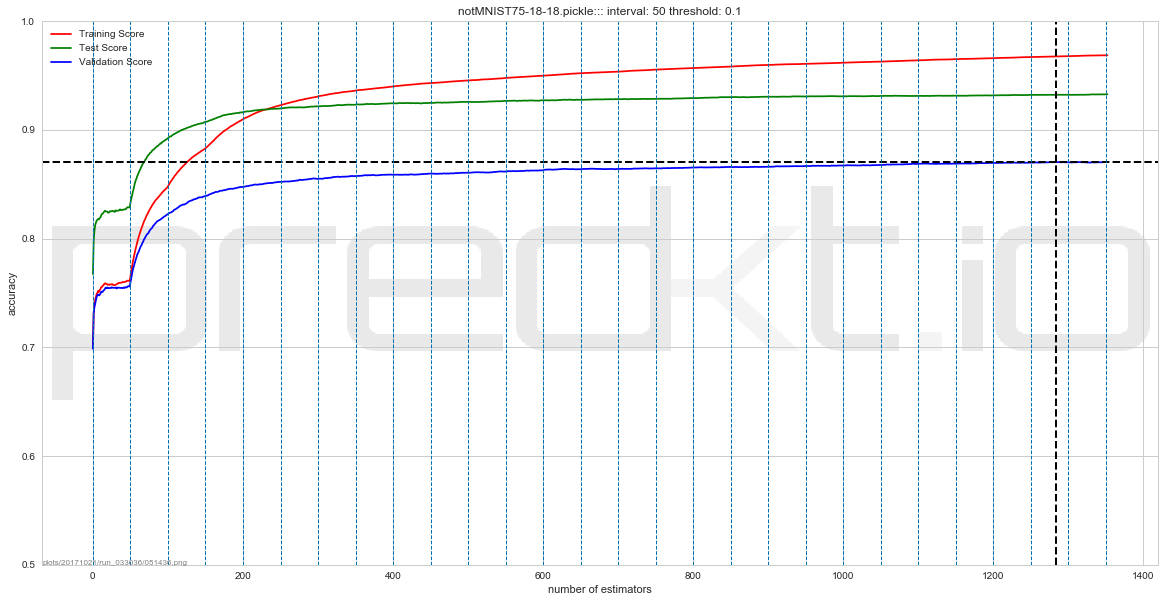

CPU times: user 1d 3h 4min 10s, sys: 4min 51s, total: 1d 3h 9min 1s
Wall time: 45min 34s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 95 rounds.
[75]	Train-merror:0.237813	Test-merror:0.168944	Valid-merror:0.243333
[150]	Train-merror:0.235907	Test-merror:0.169333	Valid-merror:0.242167
[225]	Train-merror:0.23376	Test-merror:0.1675	Valid-merror:0.238556
[300]	Train-merror:0.2318	Test-merror:0.165556	Valid-merror:0.237333
[375]	Train-merror:0.229067	Test-merror:0.1635	Valid-merror:0.235167
[450]	Train-merror:0.22668	Test-merror:0.161389	Valid-merror:0.233278
[525]	Train-merror:0.2238	Test-merror:0.159611	Valid-merror:0.231
[600]	Train-merror:0.222187	Test-merror:0.157944	Valid-merror:0.228833
[675]	Train-merror:0.22056	Test-merror:0.156	Valid-merror:0.226389
[750]	Train-merror:0.218547	Test-merror:0.154056	Valid-merror:0.223667
[

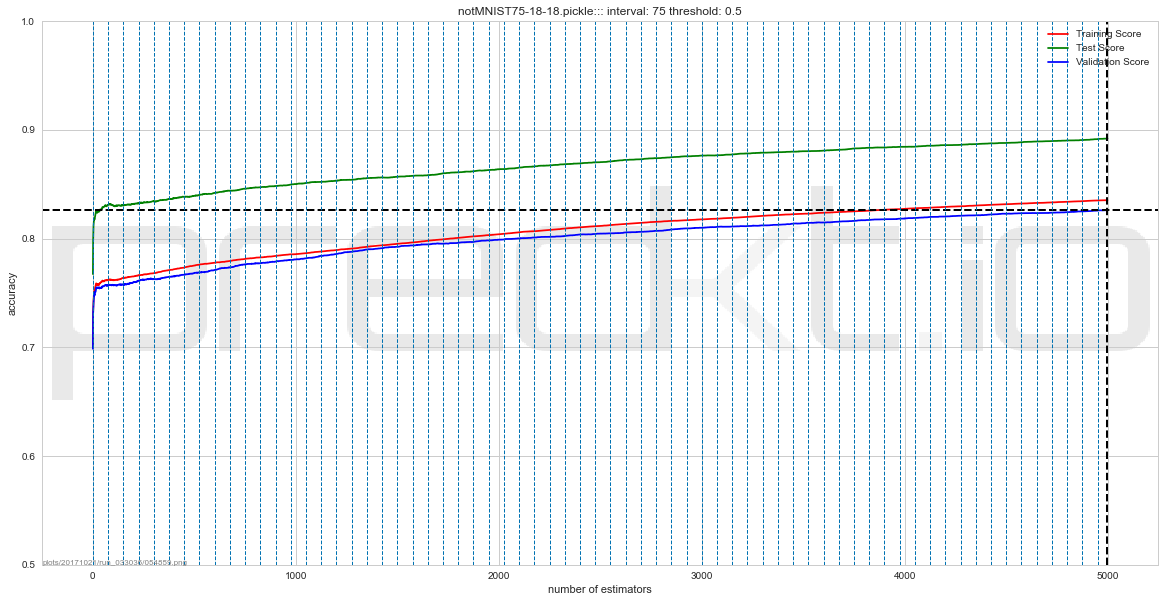

CPU times: user 20h 27min 8s, sys: 7min 46s, total: 20h 34min 54s
Wall time: 34min 23s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 95 rounds.
[75]	Train-merror:0.232107	Test-merror:0.165722	Valid-merror:0.239167
[150]	Train-merror:0.056627	Test-merror:0.082278	Valid-merror:0.148722
[225]	Train-merror:0.031307	Test-merror:0.071722	Valid-merror:0.136278
[300]	Train-merror:0.0402	Test-merror:0.073056	Valid-merror:0.137056
Stopping. Best iteration:
[226]	Train-merror:0.031387	Test-merror:0.071778	Valid-merror:0.136056



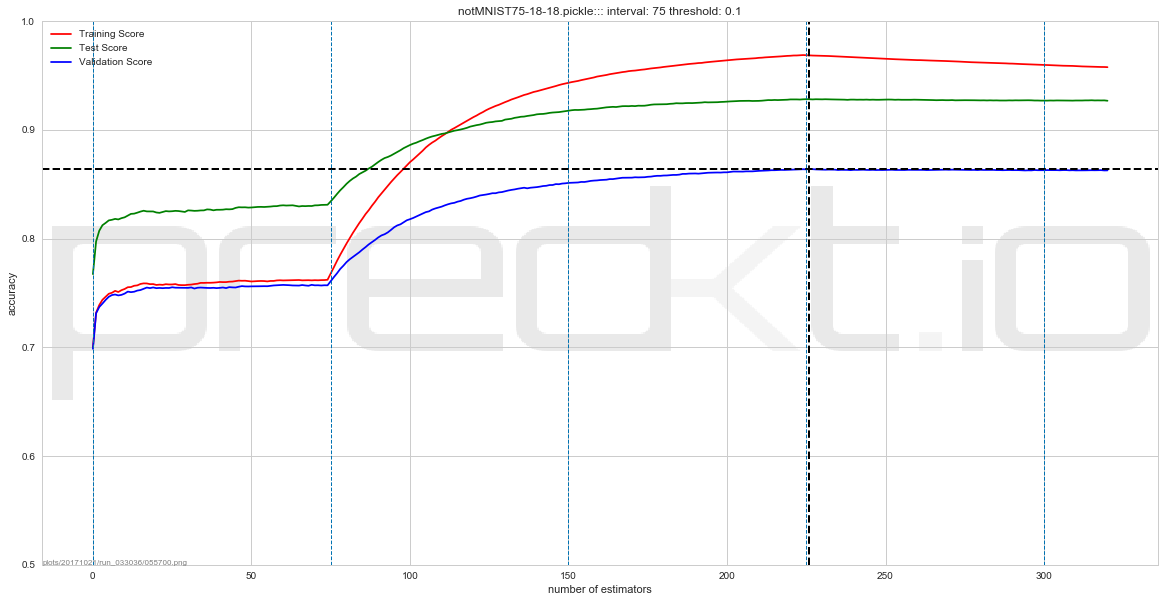

CPU times: user 4h 43min 59s, sys: 1min 9s, total: 4h 45min 8s
Wall time: 8min
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 120 rounds.
[100]	Train-merror:0.238307	Test-merror:0.169611	Valid-merror:0.242778
[200]	Train-merror:0.234747	Test-merror:0.168167	Valid-merror:0.239944
[300]	Train-merror:0.2318	Test-merror:0.165556	Valid-merror:0.237333
[400]	Train-merror:0.22816	Test-merror:0.162833	Valid-merror:0.234389
[500]	Train-merror:0.22476	Test-merror:0.1605	Valid-merror:0.2315
[600]	Train-merror:0.222187	Test-merror:0.157944	Valid-merror:0.228833
[700]	Train-merror:0.21976	Test-merror:0.155778	Valid-merror:0.225278
[800]	Train-merror:0.21764	Test-merror:0.152944	Valid-merror:0.223
[900]	Train-merror:0.215867	Test-merror:0.151611	Valid-merror:0.221
[1000]	Train-merror:0.21424	Test-merror:0.149722	Valid-merror:0.219056
[1100]	T

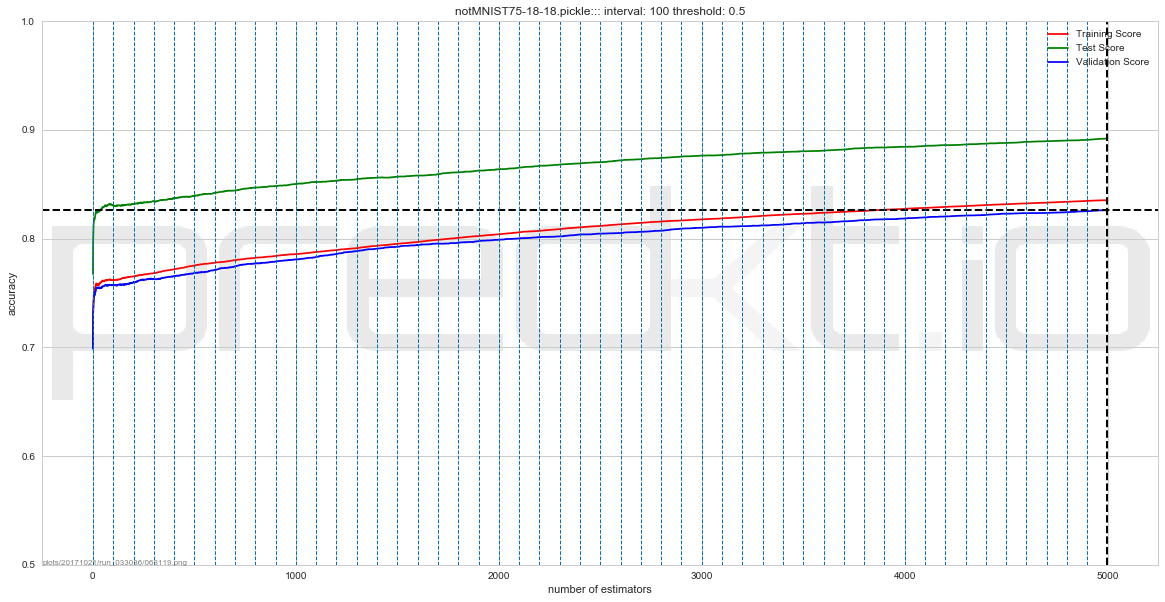

CPU times: user 20h 24min 39s, sys: 7min 35s, total: 20h 32min 14s
Wall time: 34min 19s
[0]	Train-merror:0.299747	Test-merror:0.232611	Valid-merror:0.301333
Multiple eval metrics have been passed: 'Valid-merror' will be used for early stopping.

Will train until Valid-merror hasn't improved in 120 rounds.
[100]	Train-merror:0.236867	Test-merror:0.168333	Valid-merror:0.241833
[200]	Train-merror:0.19564	Test-merror:0.135556	Valid-merror:0.204222
[300]	Train-merror:0.184973	Test-merror:0.127333	Valid-merror:0.196222
[400]	Train-merror:0.094107	Test-merror:0.096556	Valid-merror:0.162778
[500]	Train-merror:0.05536	Test-merror:0.083389	Valid-merror:0.148611
[600]	Train-merror:0.039733	Test-merror:0.077667	Valid-merror:0.141667
[700]	Train-merror:0.04444	Test-merror:0.080056	Valid-merror:0.143
Stopping. Best iteration:
[600]	Train-merror:0.039733	Test-merror:0.077667	Valid-merror:0.141667



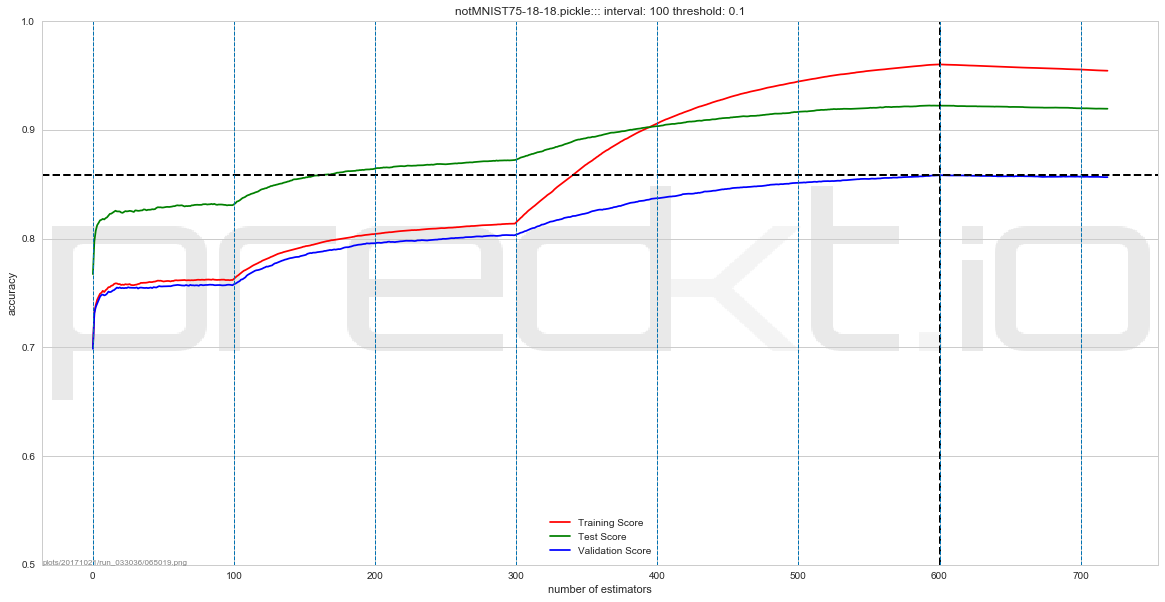

CPU times: user 11h 15min 37s, sys: 2min 21s, total: 11h 17min 58s
Wall time: 18min 59s


'Run Details:'

/datadisk/public/predkt/tuner/sandbox/runprofiles/20171021/summary_20171021033036.txt

In [6]:
data_pickles = ['notMNIST20-10-10.pickle','notMNIST50-15-15.pickle','notMNIST75-18-18.pickle']



base_early_stopping =20
intervals=[0,25,50,75,100]
thresholds =[0.5, 0.1]

early_stopping_rounds = base_early_stopping +intervals[0]
print(early_stopping_rounds)
for dataset in data_pickles:
    

    context = hf.get_new_context(version_list)
    datasets, labels = hf.load_dataset(dataset, context)
    
    for interval in intervals:
        for threshold in thresholds:
                
            %time tuned = hf.modelfit(params = starting_parameters, datasets = datasets, labels = labels, context = context, title = dataset+ '::: interval: '+ str(interval) + ' threshold: ' +str(threshold),parameter_ranges= parameter_ranges,interval = interval,threshold = threshold, early_stopping_rounds =base_early_stopping+interval)
    
    file = FileLink(context['summary'])
    display('Run Details:',file)
    
